Water Network: d1_Sample_input_cycle_twoloop 

Solve the original nonconvex optimization problem using IPOPT 
Objective:  417193.6170959675
solve_result:  solved
Solve_time: 0.248247 

Generate the acyclic network using ipopt solution
Fix the flow direction in optimization model and solve the updated model
inarc: [(3, 5), (4, 5), (7, 5), (6, 7)]

"option abs_boundtol 1.5410614651045762e-06;"
or "option rel_boundtol 1.5410614651045762e-09;"
will change deduced dual values.

con1.dual [*] :=
1         0
2  -4483940
3  -4483450
4  -4483700
5  -4483040
6  -4483400
7  -4482590
;

con2[i,j].dual :=
3 5   -6310.56
4 5      -8.14263
6 7     -11.5368
7 5    6318.71
;

sum{i in nodes} h[i] = 1386.07

total absolute headloss: 40.116465756536
total absolute flow: 872.2157
Objective:  417193.61708991486
solve_result:  solved
Solve_time: 0.05768200000000001

Presolve the model for fixing the arc direction
Is node 1 in cycle? False
Fix the arc (1, 2)
Is node 2 in cycle? True
Fix the arc (2, 4)
Fix th

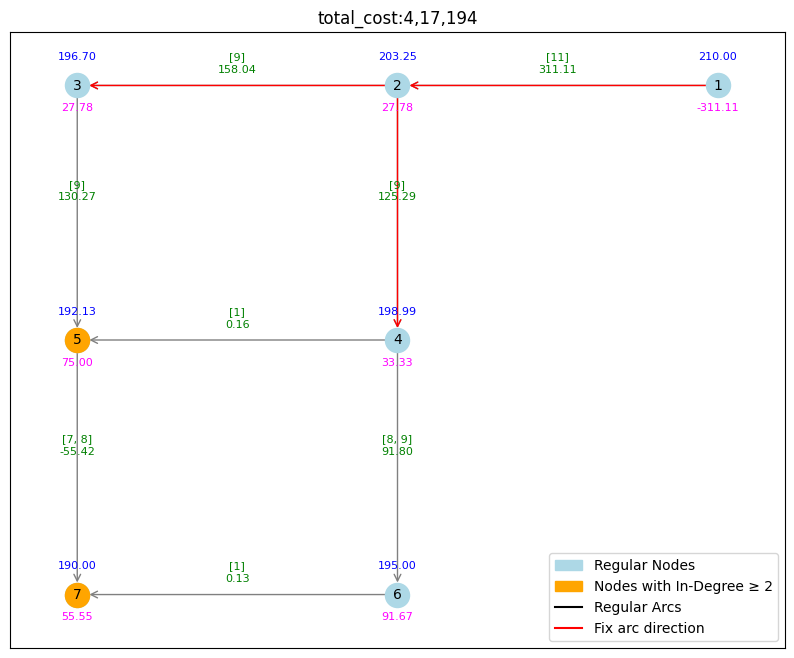

Iteration : 1
Acyclic network arcs direction:  [(1, 2), (2, 4), (2, 3), (3, 5), (4, 5), (4, 6), (5, 7), (6, 7)]
Fixed arc set: [(1, 2), (2, 4), (2, 3)]
inarc: [(3, 5), (4, 5), (7, 5), (6, 7)]
Node: 5 in_degree: 2
Acyclic True
Arc (3, 5) Acyclic: True Best optimal:  417,194 New optimal:  417,194 Solve_time: 0.058235999999999954 Solve_result:  solved Improved: No
Acyclic True
Arc (4, 5) Acyclic: True Best optimal:  417,194 New optimal:  417,194 Solve_time: 0.04737900000000006 Solve_result:  solved Improved: Yes

"option abs_boundtol 1.5422442629642319e-06;"
or "option rel_boundtol 1.542244262964232e-09;"
will change deduced dual values.

con1.dual [*] :=
1     0
2  -582.432
3   -98.2367
4  -346.822
5   312.44
6   -46.1011
7   761.15
;

con2[i,j].dual :=
3 5   -6310.56
4 5      -8.14263
6 7     -11.5368
7 5    6318.71
;



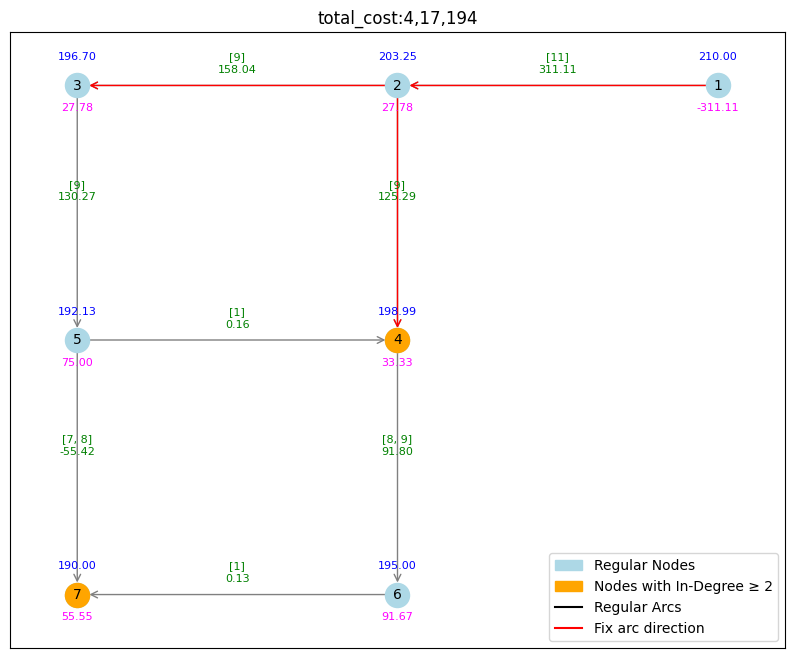

 
Node: 7 in_degree: 2
Acyclic True
Arc (5, 7) Acyclic: True Best optimal:  417,194 New optimal:  417,194 Solve_time: 0.05242199999999997 Solve_result:  solved Improved: No
Acyclic True
Arc (6, 7) Acyclic: True Best optimal:  417,194 New optimal:  417,194 Solve_time: 0.04728600000000016 Solve_result:  solved Improved: No
 
Iteration : 2
Acyclic network arcs direction:  [(1, 2), (2, 4), (2, 3), (3, 5), (4, 6), (5, 7), (5, 4), (6, 7)]
Fixed arc set: [(1, 2), (2, 4), (2, 3)]
inarc: [(2, 4), (4, 5), (7, 5), (6, 7)]
Node: 4 in_degree: 2
Acyclic True
Arc (5, 4) Acyclic: True Best optimal:  417,194 New optimal:  457,483 Solve_time: 0.06515899999999997 Solve_result:  solved Improved: No
 
Node: 7 in_degree: 2
Acyclic False
Arc (5, 7) Acyclic: False
Acyclic True
Arc (6, 7) Acyclic: True Best optimal:  417,194 New optimal:  417,194 Solve_time: 0.04324899999999987 Solve_result:  solved Improved: Yes

"option abs_boundtol 7.01974158801022e-07;"
or "option rel_boundtol 7.01974158801022e-10;"
will c

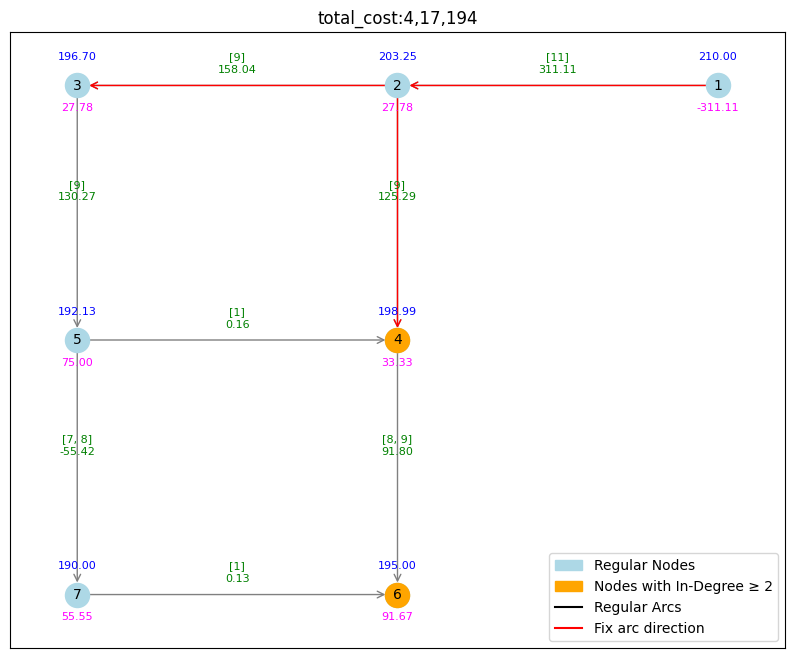

 
Iteration : 3
Acyclic network arcs direction:  [(1, 2), (2, 4), (2, 3), (3, 5), (4, 6), (5, 4), (5, 7), (7, 6)]
Fixed arc set: [(1, 2), (2, 4), (2, 3)]
inarc: [(2, 4), (4, 5), (4, 6), (6, 7)]
Node: 4 in_degree: 2
Acyclic True
Arc (5, 4) Acyclic: True Best optimal:  417,194 New optimal:  457,483 Solve_time: 0.06726100000000002 Solve_result:  solved Improved: No
 
Node: 6 in_degree: 2
Acyclic True
Arc (4, 6) Acyclic: True Best optimal:  417,194 New optimal:  417,194 Solve_time: 0.04931099999999988 Solve_result:  solved Improved: No
Acyclic True
Arc (7, 6) Acyclic: True Best optimal:  417,194 New optimal:  465,748 Solve_time: 0.06573399999999996 Solve_result:  solved Improved: No
 
*********************************************************Final best results***************************************************************
Water Network: 0
Final best objective: 417193.61705582927
Solver_time: 0.8019659999999998
Heuristic elapsed time: 1.7360725402832031


In [2]:
import networkx as nx
from amplpy import AMPL
import matplotlib.pyplot as plt
import numpy as np
import time
import copy
import sys
import os
import contextlib
from sklearn.decomposition import PCA
import random

import matplotlib.lines as mlines
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

class WaterNetworkOptimizer:
    def __init__(self, model_file, data_file, data_number):
        self.ampl = AMPL()
        self.model_file = model_file
        self.data_file = data_file
        self.data_number = data_number
        self.total_cost = None
        self.network_graph = None
        self.solve_result = None
        self.solver_time = 0

    def load_model(self):
        """Load the model and data."""
        self.ampl.reset()
        self.ampl.read(self.model_file)
        self.ampl.read_data(self.data_file)
        self.arcs = self.ampl.get_set("arcs")
        self.pipes = self.ampl.get_set("pipes")

    def create_digraph(self):
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list()
        self.network_graph = nx.DiGraph()
        self.network_graph.add_nodes_from(nodes_list)
        self.network_graph.add_edges_from(edges_list)
        print(nodes_list)
        print(edges_list)

    def display_results(self):
        """Display relevant results from the optimization."""
        self.ampl.eval("display {(i,j) in arcs, k in pipes:l[i,j,k]>1} l[i,j,k];")
        self.ampl.eval("display {(i,j) in arcs}: q[i,j];")
        self.ampl.eval("display h;")
        self.ampl.eval("display solve_result;")
        self.total_cost = self.ampl.get_objective("total_cost").value()
        print("Objective:", self.total_cost)
        # self.ampl.eval("display {(i,j) in arcs} h[i] - h[j];")
        # self.ampl.eval("display {i in nodes} h[i] - (E[i] + P[i]);")

    def display_best_results(self,ampl):
        ampl.eval("display {(i,j) in arcs}: q[i,j];")
        ampl.eval("display l;")
        ampl.eval("display h;")
        ampl.eval("display solve_result;")
        total_cost = ampl.get_objective("total_cost").value()
        print("Objective:", total_cost)
    
    # def plot_graph(self):
    #     print("Edges of the graph:",self.network_graph.edges())
    #     plt.figure(figsize=(10, 8))
    #     nx.draw_spectral(self.network_graph, with_labels=True)
    #     plt.show()


    def plot_graph1(self, super_source_out_arc=None, best_arc=None,current_cost = None, iteration= 1):
        # print("Edges of the graph:", self.network_graph.edges())
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        
        plt.figure(figsize=(10, 8))
        pos = nx.spectral_layout(self.network_graph)
        nx.draw_networkx_nodes(self.network_graph, pos, node_color='lightblue', node_size=200)
        
        if indegree_2_or_more:
            nx.draw_networkx_nodes(self.network_graph, pos, nodelist=indegree_2_or_more, node_color='orange', node_size=200)
            
        nx.draw_networkx_labels(self.network_graph, pos)
        nx.draw_networkx_edges(self.network_graph, pos, edge_color='black')
        
        if super_source_out_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=super_source_out_arc, edge_color='red', width=1)
            
        if best_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=[best_arc], edge_color='magenta', width=1)
            
        plt.title(f"total_cost:{self.total_cost}")
        plt.savefig(f"/home/nitishdumoliya/waterNetwork/model/figure/d{self.data_number}_iteration_{iteration}.png")
        plt.box(False)
        plt.show()

    def plot_graph(self, super_source_out_arc=None, current_cost = None, iteration = 1, edge_weights= None, h = None, D = None, arc=(0,0), l ={}, C = {}):
        # self.network_graph = nx.DiGraph()
        # self.network_graph.add_edges_from(edges)
        # Node positions as per your specifications
        
        new_positions0 = {
             2 : (2000.00, 3000.00),
             3 : (1000.00, 3000.00),        
             4 : (2000.00, 2000.00),        
             5 : (1000.00, 2000.00),       
             6 : (2000.00, 1000.00),       
             7 : (1000.00, 1000.00),      
             1 : (3000.00, 3000.00)     
            }  
        
        new_positions1 = {
            2: (6000.00, 2000.00),
            3: (6000.00, 4000.00),
            4: (7500.00, 4000.00),
            5: (9000.00, 4000.00),
            6: (10000.00, 4000.00),
            7: (10000.00, 6000.00),
            8: (10000.00, 8000.00),
            9: (10000.00, 10000.00),
            10: (9000.00, 10000.00),
            11: (9000.00, 11500.00),
            12: (9000.00, 13000.00),
            13: (7000.00, 13000.00),
            14: (8000.00, 10000.00),
            15: (7000.00, 10000.00),
            16: (6000.00, 10000.00),
            17: (6000.00, 8500.00),
            18: (6000.00, 7000.00),
            19: (6000.00, 5500.00),
            20: (4500.00, 4000.00),
            21: (4500.00, 2000.00),
            22: (4500.00, 0.00),
            23: (3000.00, 4000.00),
            24: (3000.00, 7000.00),
            25: (3000.00, 10000.00),
            26: (4000.00, 10000.00),
            27: (5000.00, 10000.00),
            28: (1500.00, 4000.00),
            29: (0.00, 4000.00),
            30: (0.00, 7000.00),
            31: (0.00, 10000.00),
            32: (1500.00, 10000.00),
            1: (8000.00, 0.00)
        }       
        
        new_positions16 = {
            2: (5679.61, 9538.83),
            3: (4862.46, 9538.83),
            4: (2750.81, 9474.11),
            5: (1852.75, 8357.61),
            6: (1974.11, 6076.05),
            7: (1974.11, 5149.68),
            8: (4235.44, 5076.86),
            9: (6411.81, 5093.04),
            10: (5412.62, 7888.35),
            11: (4510.52, 8264.56),
            12: (3033.98, 9243.53),
            13: (2301.78, 8078.48),
            14: (2944.98, 7669.90),
            15: (3786.41, 7139.97),
            16: (4830.10, 6480.58),
            17: (7099.51, 8438.51),
            18: (5505.66, 8450.65),
            19: (3563.92, 8839.00),
            20: (3167.48, 7532.36),
            21: (2730.58, 7285.60),
            22: (3511.33, 6666.67),
            23: (4097.90, 6286.41),
            24: (3337.38, 5121.36),
            25: (4530.74, 6011.33),
            26: (4215.21, 7783.17),
            27: (5194.17, 7055.02),
            28: (5218.45, 5089.00),
            29: (5622.98, 5999.19),
            30: (5950.65, 5796.93),
            31: (6614.08, 7621.36),
            32: (5380.26, 7544.50),
            33: (6318.77, 7281.55),
            34: (6549.35, 7212.78),
            35: (6585.76, 6092.23),
            36: (7152.10, 6104.37),
            1: (7111.65, 7532.36),
            37: (7669.90, 7783.17)
        }

        # # Update node positions
        pos = new_positions0
        # pos = nx.spectral_layout(self.network_graph)

        plt.figure(figsize=(10, 8))
        cmap = plt.cm.plasma

        # Draw nodes with default color (lightblue)
        nx.draw_networkx_nodes(self.network_graph, pos, node_color='lightblue', node_size=300, label='Regular Nodes')
        
        cost = {}
        
        for (i,j) in self.ampl.getSet('arcs'):
            cost[i,j] = sum(l[i,j,k] * C[k] for k in self.ampl.getSet('pipes'))
        
        if cost:
            for (u, v), value in cost.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                # plt.text(mid_x, mid_y+500 , f"{value:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
                # plt.text(mid_x, mid_y + 100, f"{value:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        
        # Highlight nodes with in-degree >= 2
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        if indegree_2_or_more:
            nx.draw_networkx_nodes(self.network_graph, pos, nodelist=indegree_2_or_more, node_color='orange', node_size=300, label='Nodes with In-Degree ≥ 2')
        
        # Draw node labels
        nx.draw_networkx_labels(self.network_graph, pos, font_size=10)
        
        # Draw edges
        nx.draw_networkx_edges(self.network_graph, pos, arrowstyle="->", arrowsize=12, edge_color='gray', label='Regular Arcs')
        
        # Highlight super-source edges in red
        if super_source_out_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=super_source_out_arc,arrowstyle="->", arrowsize=12, edge_color='red', width=1, label='Fix arc direction')
        
        # Highlight the best arc in magenta
        # if best_arc:
        #     nx.draw_networkx_edges(self.network_graph, pos, edgelist=[best_arc],arrowstyle="->", arrowsize=12, edge_color='magenta', width=1, label = 'Best arc')
        # Annotate node demands
        if h:
            for node, (x, y) in pos.items():
                demand = h.get(node, 0)  # Get the head for the node, default to 0 if not in dictionary
                # plt.text(x, y + 250, f"{demand:.2f}", fontsize=8, color='blue', ha='center')  # Annotate demand below the node
                plt.text(x, y + 100, f"{demand:.2f}", fontsize=8, color='blue', ha='center')  # Annotate demand below the node
                # plt.text(x, y -100 , f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
                # plt.text(mid_x, mid_y + 50 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
                # plt.text(mid_x, mid_y + 100, f"{value:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        if D:
            for node, (x, y) in pos.items():
                demand = D.get(node, 0)  # Get the demand for the node, default to 0 if not in dictionary
                # plt.text(x, y - 300, f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
                plt.text(x, y -100 , f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
        
        # Annotate edge weights
        if edge_weights:
            for (u, v), weight in edge_weights.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                # plt.text(mid_x, mid_y+100 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
                plt.text(mid_x, mid_y + 50 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        pipe_dia_arc = {}
        for (i,j) in self.arcs:
            list_=[]
            for k in self.pipes:
                if l[i,j,k]>= 1e-5:
                    list_.append(k)
            pipe_dia_arc[i,j] = list_
        
        if pipe_dia_arc:
            for (u, v), weight in pipe_dia_arc.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                plt.text(mid_x, mid_y+100 , f"{weight}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        
            
        
        
        # Create legend
        regular_node_patch = mpatches.Patch(color='lightblue', label='Regular Nodes')
        indegree_node_patch = mpatches.Patch(color='orange', label='Nodes with In-Degree ≥ 2')
        regular_edge_line = mlines.Line2D([], [], color='black', label='Regular Arcs')
        super_source_edge_line = mlines.Line2D([], [], color='red', label='Fix arc direction')
        # best_edge_line = mlines.Line2D([], [], color='magenta', label='Best Arc')
        plt.legend(handles=[regular_node_patch, indegree_node_patch, regular_edge_line, super_source_edge_line], loc='lower right')
        
        cost = round(self.total_cost)
        # res = f"{cost:,}"
        plt.title(f"total_cost:{self.format_indian_number(cost)}")
        (u,v) = arc
        plt.savefig(f"/home/nitishdumoliya/waterNetwork/model/figure/d{self.data_number}_iteration_{iteration}_{u}_{v}.png")
        plt.box(True)
        plt.show()
        
    def cycle_basis(self):
        root = self.ampl.getSet('Source').to_list()[0]
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list() 
        uwg = nx.Graph()
        uwg.add_nodes_from(nodes_list)
        uwg.add_edges_from(edges_list)
        # print("Edges in the undirected graph:", edges_list)
        print("cycle basis for given water network: ",nx.cycle_basis(uwg, root))
        
    def generate_random_acyclic_from_solution(self):
        print("Generate the acyclic network using ipopt solution")
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list()
        
        self.network_graph = nx.DiGraph()
        self.network_graph.add_nodes_from(nodes_list)
        
        q = self.ampl.getVariable('q').getValues().toDict()
        for (i,j) in edges_list:
            if q[i,j] >= 0:
                self.network_graph.add_edge(i,j)
            else:
                self.network_graph.add_edge(j,i)

    def generate_random_acyclic_graph(self):
        uwg = nx.Graph()
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list()
        uwg.add_nodes_from(nodes_list)
        uwg.add_edges_from(edges_list)
        print("Edges in the undirected graph:", edges_list)
        
        # Generate a random spanning tree using Wilson's algorithm
        random_tree = nx.random_spanning_tree(uwg)
        
        # Retrieve the root from the AMPL source set
        root_l = self.ampl.getSet('Source').to_list()
        root = root_l[0]
        print("Root node:", root)

        # Ensure the root is present in the random tree
        if root not in random_tree.nodes:
            raise ValueError("The specified root must be a node in the graph.")

        # Create a directed graph from the random tree starting from the specified root
        self.network_graph = nx.DiGraph()
        visited = set()

        def dfs(node):
            visited.add(node)
            for neighbor in random_tree.neighbors(node):
                if neighbor not in visited:
                    self.network_graph.add_edge(node, neighbor) 
                    dfs(neighbor)

        # Start DFS from the specified root
        dfs(root)

        # Draw the initial directed tree
        plt.figure(figsize=(15, 10))
        plt.subplot(121)
        nx.draw_spectral(self.network_graph, with_labels=True, node_color='lightgreen', font_weight='bold', arrows=True)
        plt.title("Directed Spanning Tree")

        # Add remaining edges from the original graph and check for cycles
        for u, v in uwg.edges():
            if not self.network_graph.has_edge(u, v):  
                self.network_graph.add_edge(u, v)  
                if not nx.is_directed_acyclic_graph(self.network_graph):  
                    self.network_graph.remove_edge(u, v)  
                    self.network_graph.add_edge(v, u)  

        # Draw the final directed graph after adding remaining edges
        plt.subplot(122)
        nx.draw_spectral(self.network_graph, with_labels=True, node_color='lightgreen', font_weight='bold', arrows=True)
        plt.title("Acyclic Directed Graph")
        plt.show()

    def update_model(self):
        # print("Fix the arcs direction using the acyclic network\n")
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        for edge in self.network_graph.edges:
            i, j = edge
            if edge in edges_list:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q[{i},{j}] >=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{j}]+P[{j}] <= h[{j}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{j}] + P[{j}] <= h[{i}];")
            else:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q[{j},{i}] <=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{i}]+P[{i}] <= h[{i}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{i}] + P[{i}] <= h[{j}];")  

    def update_model_lp(self):
        # print("Fix the arcs direction using the acyclic network\n")
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        for edge in self.network_graph.edges:
            i, j = edge
            if edge in edges_list:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q_lp[{i},{j}] >=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{j}]+P[{j}] <= h[{j}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{j}] + P[{j}] <= h[{i}];")
            else:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q_lp[{j},{i}] <=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{i}]+P[{i}] <= h[{i}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{i}] + P[{i}] <= h[{j}];") 
    
    def updated_data_file(self):
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        # Example: Update parameter values
        q = self.ampl.getVariable('q').getValues().to_dict()
        L = self.ampl.getParameter('L').getValues().to_dict()
        for (i,j), value in q.items():
            self.ampl.getParameter('arcs').setValues({
                ('NewYork', 'LosAngeles'): 2500,
                ('NewYork', 'Chicago'): 750,
                ('LosAngeles', 'Chicago'): 1900
            })

    def is_valid_edge(self, source, target):
        """Check if adding the directed edge (source -> target) maintains acyclicity."""
        self.network_graph.add_edge(source, target)  # Temporarily add the edge
        is_dag = nx.is_directed_acyclic_graph(self.network_graph)  # Check for acyclicity
        self.network_graph.remove_edge(source, target)  # Remove the edge after checking
        return is_dag  # Return True if it maintains acyclicity     
    
    def check_incoming_arcs(self):
        root = list(self.ampl.getSet('Source'))[0]
        # Iterate over all nodes in the graph
        for node in self.network_graph.nodes():
            # Skip the root node
            if node == root:
                continue
            # Check if the in-degree of the node is at least 1
            if self.network_graph.in_degree(node) < 1:
                # print(f"Node {node} does not have any incoming arcs.")
                return False
        # print("All nodes except the root have at least one incoming arc.")
        return True
            
    def format_indian_number(self,num):
        num_str = str(num)
        if len(num_str) <= 3:
            return num_str
        else:
            # Split the number into the last three digits and the rest
            last_three = num_str[-3:]
            remaining = num_str[:-3]
            # Add commas every two digits in the remaining part
            remaining = ','.join([remaining[max(i - 2, 0):i] for i in range(len(remaining), 0, -2)][::-1])
            return remaining + ',' + last_three

    def fix_leaf_arc_flow(self):
        graph = nx.Graph()
        arc_set = self.ampl.getSet('arcs').to_list()  
        graph.add_edges_from(arc_set)
        D = self.ampl.getParameter('D').getValues().to_dict()  
        source = self.ampl.getSet('Source').to_list()[0]
        fixed_arcs = set()
        # print("\nPresolve the model for fixing the flow value in the leaf arcs")
        # print("Source:",self.ampl.getSet('Source').to_list())

        while True:
            leaf_nodes = [node for node in graph.nodes if graph.degree[node] == 1]
            # print("leaf_nodes:", leaf_nodes)
            if not leaf_nodes:  
                break

            for leaf in leaf_nodes:
                neighbor = next(graph.neighbors(leaf))
                if (neighbor, leaf) in arc_set:
                    edge = (neighbor, leaf)
                    if edge not in fixed_arcs:  
                        if leaf == source:
                            flow_value = D[leaf]
                            D[neighbor] = (D[neighbor]+flow_value)
                            source = neighbor
                        else:
                            flow_value = D[leaf]
                            D[neighbor] = D[neighbor] + flow_value
                        self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        # print(f"Fixing flow for arc {edge}: {flow_value}")
                        fixed_arcs.add(edge)  

                    graph.remove_node(leaf)
                else:
                    edge = (leaf, neighbor)
                    if edge not in fixed_arcs:  
                        if leaf == source:
                            flow_value = -D[leaf]
                            D[neighbor] = D[neighbor]-flow_value
                            source = neighbor
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        elif neighbor == source:
                            flow_value = -D[leaf]
                            D[neighbor] = D[neighbor] - D[leaf] 
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        else:
                            flow_value = -D[leaf]
                            D[neighbor] += -flow_value
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        # print(f"Fixing flow for arc {edge}: {flow_value}")
                        fixed_arcs.add(edge)  
                    graph.remove_node(leaf)
        # print("All leaf arc flows have been fixed.")


    def is_cycle(self, graph, start_node, end_node, visited_copy, parent):
        visited_copy[start_node] = True
        # print(f"Is node {end_node} in cycle?")
        for neighbor in graph.neighbors(start_node):
            # print("visited",neighbor,visited_copy[neighbor])
            if not visited_copy[neighbor]:
                # print("neighbor of node", start_node, "is", neighbor)
                isCycle = self.is_cycle(graph, neighbor, end_node, visited_copy, start_node)
                if isCycle:
                    return True
            else:
                # print("parent:", parent)
                if parent != neighbor:
                    if end_node == neighbor:
                        # print(f"Node {end_node} is in cycle")
                        return True
        return False

    def presolve(self, graph, node, visited, parent, set_arc):
        visited_copy = visited.copy()
        # print(visited_copy)
        isCycle = self.is_cycle(graph, node, node, visited_copy, parent)
        print(f"Is node {node} in cycle?",isCycle)
        visited[node] = True
        if isCycle:
            for neighbor in graph.neighbors(node):
                if parent!=neighbor:
                    set_arc.append((node,neighbor))
                    print("Fix the arc", (node, neighbor))
            return set_arc
        else:
            for neighbor in graph.neighbors(node):
                if parent != neighbor:
                    set_arc.append((node,neighbor))
                    # print(set_arc)
                    print("Fix the arc", (node, neighbor))
                    # print("neighbor:", neighbor)
                    self.presolve(graph, neighbor, visited, node, set_arc)
        return set_arc

    def fix_arc_set(self):
        graph = nx.Graph()
        arc_set = self.ampl.getSet('arcs').to_list()
        graph.add_edges_from(arc_set)
        visited = {node: False for node in graph.nodes()}
        source = self.ampl.getSet('Source').to_list()[0]
        set_arc = []
        print("\nPresolve the model for fixing the arc direction")
        set_ = self.presolve(graph, source, visited, -1, set_arc)
        print("fixed arc direction:",set_, "\n") 
        return set_

    def generate_initial_points(self):
        # self.ampl = AMPL()
        self.ampl.reset()
        self.ampl.read("/home/nitishdumoliya/waterNetwork/model/mccormic_rel.mod")
        self.ampl.read_data(self.data_file)
        self.ampl.option['solver'] = 'cplexamp'
        self.update_model()
        self.ampl.solve()
        l_solution = self.ampl.get_variable("l").get_values().to_dict()
        q_solution = self.ampl.get_variable("q").get_values().to_dict()
        h_solution = self.ampl.get_variable("h").get_values().to_dict()
        
        print("total_cost:", self.ampl.get_objective("total_cost").value())
        
#         self.ampl.reset()
#         self.ampl.read("/home/nitishdumoliya/waterNetwork/model/potentialBasedFlow/content_model.mod")
#         self.ampl.read_data(self.data_file)
#         self.ampl.option['solver'] = 'ipopt'
#         self.ampl.option['presolve_eps'] = '1.19e-08'
#         self.update_model()
        
#         for (i, j, k) in l_solution.keys():
#             if l_solution[i, j, k] >= 1:
#                 self.ampl.eval(f"s.t. fix_length_{i}_{j}_{k}: l[{i},{j},{k}]={l_solution[i, j, k]};")
        
#         self.ampl.solve()
#         # l_solution = self.ampl.get_variable("l").get_values().to_dict()
#         q_solution = self.ampl.get_variable("q").get_values().to_dict()
#         # h_solution = self.ampl.get_variable("h").get_values().to_dict()
#         print("total_cost:", self.ampl.get_objective("total_cost").value())
        
        self.ampl.reset()
        self.ampl.read("../lpNlp/lp_model.mod")
        self.ampl.read_data(self.data_file)
        self.ampl.option['solver'] = 'cplexamp'
        # self.update_model_lp()   
        
        for (i, j), value in q_solution.items():
            self.ampl.param['q_lp'][i, j] = value
        
        self.ampl.solve()
        l_solution = self.ampl.get_variable("l_lp").get_values().to_dict()
        h_solution = self.ampl.get_variable("h_lp").get_values().to_dict()
        print("total_cost:", self.ampl.get_objective("total_cost").value())
        
        return l_solution, q_solution, h_solution
        
    def update_initial_points(self,l_solution, q_solution, h_solution):
        for (i, j, k), val in l_solution.items():
            self.ampl.eval(f'let l[{i},{j},{k}] := {val};')
        for (i, j), val in q_solution.items():
            self.ampl.eval(f'let q[{i},{j}] := {val};')
        for i, val in h_solution.items():
            self.ampl.eval(f'let h[{i}] := {val};')

    def update_initial_points1(self,l_solution, q_solution, h_solution):
        for (i, j, k), val in l_solution.items():
            self.ampl.eval(f'let l[{i},{j},{k}] := {val};')
        
        edge_list_network = self.network_graph.edges
        for (i, j), val in q_solution.items():
            if (i,j) in edge_list_network:
                self.ampl.eval(f"let q[{i},{j}]:= {val};")
            else:
                self.ampl.eval(f'let q[{i},{j}] := {-val};')
        for i, val in h_solution.items():
            self.ampl.eval(f'let h[{i}] := {val};')

    def iterate_arc(self, iteration, best_acyclic_flow, improved, current_cost, l, q, h, best_arc, super_source_out_arc):
        improved = False
        self.network_graph = best_acyclic_flow.copy()
        print("Acyclic network arcs direction: ",self.network_graph.edges())
        # self.plot_graph(super_source_out_arc, best_arc, current_cost, iteration)
        print("Fixed arc set:",super_source_out_arc)
        BEST_ARC = []
        # BEST_ARC.append(best_arc)
        l = self.ampl.getVariable('l').getValues().to_dict()
        q = self.ampl.getVariable('q').getValues().to_dict()
        h = self.ampl.getVariable('h').getValues().to_dict()
        D = self.ampl.getParameter('D').getValues().to_dict()
        C = self.ampl.getParameter('C').getValues().to_dict()
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        inarc = []
        for node in indegree_2_or_more:
            for (u, v) in list(self.network_graph.in_edges(node)):
                if (u, v) in edges_list:
                    inarc.append((u,v))
                else:
                    inarc.append((v,u))
        print("inarc:", inarc)
        inarc_ = inarc
        
        inarc_set = []
        for (i, j) in inarc:
            if (i, j) in edges_list:
                inarc_set.append(f"({i},{j})")
            else:
                inarc_set.append(f"({j},{i})")
        
        # Convert the list into a string compatible with AMPL
        inarc_set = ", ".join(inarc_set)
        
        for node in indegree_2_or_more:
            print("Node:", node,"in_degree:", self.network_graph.in_degree(node))
            for u,v in list(self.network_graph.in_edges(node)):
                if (u,v) not in super_source_out_arc:
                    self.network_graph.remove_edge(u,v)
                    self.network_graph.add_edge(v,u)
                    acy_check = nx.is_directed_acyclic_graph(self.network_graph)
                    in_arc_check = self.check_incoming_arcs()
                    print("Acyclic", acy_check and in_arc_check)
                    if acy_check and in_arc_check:
                        #l_sol, q_sol, h_sol = self.generate_initial_points()
                        self.load_model()
                        self.ampl.eval(f"set inarc := {{{inarc_set}}};")
                        self.ampl.eval(f"set indegree_node := {{{set(indegree_2_or_more)}}};")
                        self.ampl.eval("minimize total_cost : sum{(i,j) in arcs} sum{k in pipes}l[i,j,k]*C[k];")
                        self.fix_leaf_arc_flow()
                        self.update_initial_points(l, q, h)
                        # self.update_model()
                        if (u,v) in edges_list:
                            self.ampl.eval(f"s.t. flow_direction{u}_{v}: q[{u}, {v}]>=0;")
                        else:
                            self.ampl.eval(f"s.t. flow_direction{u}_{v}: q[{v}, {u}]<=0;")
                        self.solve()
                        # print("cost:", self.total_cost)   
                        #self.display_results()
                        l = self.ampl.getVariable('l').getValues().to_dict()
                        q = self.ampl.getVariable('q').getValues().to_dict()
                        h = self.ampl.getVariable('h').getValues().to_dict()
                        
                        # self.plot_graph(super_source_out_arc, self.total_cost, iteration, q, h, D, (v,u))
                        if self.solve_result == "solved":
                            # result_h = 0
                            # result_q = 0
                            # for arc in self.arcs:
                            #     i, j = arc
                            #     result_h += abs(h[i] - h[j])
                            #     result_q += abs(q[i,j]) 
                            # print("total absolute headloss:", result_h)
                            # print("total absolute flow:", result_q)

                            # self.ampl.eval("display con1.dual;")
                            # self.ampl.eval("display {(i,j) in inarc} con2.dual[i,j];")
                            # self.ampl.eval("display sum{i in nodes} h[i];")
                            # self.plot_graph(super_source_out_arc, current_cost, iteration, q, h, D, (u,v), l, C)
                            if self.total_cost < current_cost:
                                print("Arc", (u,v),"Acyclic:", acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)), "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result, "Improved: Yes")
                                current_cost = self.total_cost
                                improved = True
                                best_acyclic_flow = self.network_graph.copy()
                                best_arc = (v,u)
                                l = self.ampl.getVariable('l').getValues().to_dict()
                                q = self.ampl.getVariable('q').getValues().to_dict()
                                h = self.ampl.getVariable('h').getValues().to_dict()
                                self.ampl.eval("display con1.dual;")
                                self.ampl.eval("display {(i,j) in inarc} con2.dual[i,j];")
                                self.plot_graph(super_source_out_arc, current_cost, iteration, q, h, D, (u,v), l, C)
                                self.network_graph.remove_edge(v, u)
                                self.network_graph.add_edge(u, v)
                                
                                # return best_acyclic_flow, improved, current_cost, l, q, h, best_arc
                                # break
                            else:
                                print("Arc", (u,v),"Acyclic:", acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)), "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result, "Improved: No")
                                self.network_graph.remove_edge(v, u)
                                self.network_graph.add_edge(u, v)  
                        else:
                            print("Arc", (u,v),"Acyclic:",acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)),  "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result)
                            self.network_graph.remove_edge(v, u)
                            self.network_graph.add_edge(u, v)                         
                    else:
                        print("Arc", (u,v),"Acyclic:",acy_check and in_arc_check)
                        self.network_graph.remove_edge(v, u)
                        self.network_graph.add_edge(u, v)                      
            print(" ")
            # if improved:
            #     break
        return best_acyclic_flow, improved, current_cost, l, q, h, best_arc
    
    def iterate_acyclic_flows(self):
        """Iterate to find improved acyclic flows by attempting arc reversals while maintaining acyclicity."""
        improved = True 
        
        best_acyclic_flow = self.network_graph.copy()
        
        if self.solve_result == "solved":
            current_cost = self.total_cost  
            l = self.ampl.getVariable('l').getValues().to_dict()
            q = self.ampl.getVariable('q').getValues().to_dict()
            h = self.ampl.getVariable('h').getValues().to_dict()
        
        elif self.solve_result != "solved":
            current_cost = 10e+14
            l = None
            q = None
            h = None
        
        # acyclicity_time = 0
        iteration = 1
        best_arc = None
        super_source_out_arc = self.fix_arc_set()
        D = self.ampl.getParameter('D').getValues().to_dict()
        C = self.ampl.getParameter('C').getValues().to_dict()
        self.plot_graph(super_source_out_arc, current_cost, 0, q, h, D, (0,0), l, C)
        # super_source_out_arc.append(best_arc)
        # print("super_source_out_arc:",super_source_out_arc)
        # super_source_out_arc = self.fix_arc(self.data_number)
        while improved:
            print("Iteration :",iteration)
            best_acyclic_flow, improved, current_cost, l, q, h, best_arc = self.iterate_arc(iteration,best_acyclic_flow, improved, current_cost, l, q, h, best_arc, super_source_out_arc)
            # print("Current best acyclic network:")
            # plt.figure(figsize=(10, 8))
            # nx.draw_spectral(best_acyclic_flow, with_labels=True)
            # plt.show()
            # super_source_out_arc = self.fix_arc()
            # super_source_out_arc.append(best_arc)
            iteration += 1
            # print(f"Current best solution: {current_cost}")
            # print(" ")
        print("*********************************************************Final best results***************************************************************")
        print("Water Network:", self.data_number)
        print(f"Final best objective: {current_cost}")
        # print("length of the arcs: ", l, "\n")
        # print("flow in the arcs: ", q, "\n")
        # print("head value at node: ", h, "\n")
        # self.network_graph = best_acyclic_flow
        # self.load_model()
        # self.update_model()
        # self.multi_solve(current_cost)
        # self.ampl.close()
    
    # Function to suppress output
    @contextlib.contextmanager
    def suppress_output(self):
        # Open devnull to suppress the output
        with open(os.devnull, 'w') as devnull:
            # Redirect stdout and stderr
            old_stdout = sys.stdout
            old_stderr = sys.stderr
            sys.stdout = devnull
            sys.stderr = devnull
            try:
                yield
            finally:
                # Restore original stdout and stderr
                sys.stdout = old_stdout
                sys.stderr = old_stderr
    
    def solve(self):
        with self.suppress_output():
            """Solve the optimization problem."""
            self.ampl.option["solver"] = "ipopt"
            self.ampl.set_option("ipopt_options", "outlev = 0 expect_infeasible_problem = yes bound_push = 0.001 bound_frac = 0.001 warm_start_init_point = yes")   #max_iter = 1000
            self.ampl.option["presolve_eps"] = "6.82e-14"
            self.ampl.option['presolve'] = 1
            # self.ampl.option['solver_msg'] = 0
            # self.ampl.option['show_stats'] = 0
            self.ampl.solve()
            self.solve_result = self.ampl.solve_result
            self.total_cost = self.ampl.get_objective("total_cost").value()
        # print("Objective:", self.total_cost)
        # print("solve_result: ",self.solve_result)
        solve_time = self.ampl.get_value('_solve_elapsed_time')
        self.solver_time += solve_time

    def run(self):
        """Main method to run the optimization process."""
        start_time = time.time() 
        print("Solve the original nonconvex optimization problem using IPOPT ")
        self.load_model()
        self.ampl.eval("minimize total_cost : sum{(i,j) in arcs} sum{k in pipes}l[i,j,k]*C[k];")
        self.fix_leaf_arc_flow()
        self.ampl.eval("subject to con7{(i,j) in arcs}: -sum{k in nodes diff Source} D[k] <= q[i,j];")
        self.ampl.eval("subject to con8{(i,j) in arcs}: q[i,j] <= sum{k in nodes diff Source} D[k];")
        self.solve()
        cost = self.total_cost
        print("Objective: ",self.total_cost)
        # self.display_results()
        # print("Objective: ",self.total_cost)
        print("solve_result: ",self.solve_result)
        print("Solve_time:", self.ampl.get_value('_solve_elapsed_time'),"\n")
        l_sol = self.ampl.getVariable('l').getValues().to_dict()
        q_sol = self.ampl.getVariable('q').getValues().to_dict()
        h_sol = self.ampl.getVariable('h').getValues().to_dict()
        # print("solve_result: ",self.solve_result)
        self.generate_random_acyclic_from_solution()
        print("Fix the flow direction in optimization model and solve the updated model")
        # print("Acyclic network:",self.network_graph.edges(), "\n")
        # self.generate_random_acyclic_graph()
        # l_sol, q_sol, h_sol = self.generate_initial_points()
        inarc = []
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        
        for node in indegree_2_or_more:
            for (u, v) in list(self.network_graph.in_edges(node)):
                if (u, v) in edges_list:
                    inarc.append((u,v))
                else:
                    inarc.append((v,u))
        print("inarc:", inarc)
        inarc_ = inarc
        
        inarc_set = []
        for (i, j) in inarc:
            if (i, j) in edges_list:
                inarc_set.append(f"({i},{j})")
            else:
                inarc_set.append(f"({j},{i})")
        inarc_set = ", ".join(inarc_set)
        
        self.load_model()
        self.ampl.eval(f"set inarc := {{{inarc_set}}};")
        self.ampl.eval(f"set indegree_node := {{{set(indegree_2_or_more)}}};")
        self.ampl.eval("minimize total_cost : sum{(i,j) in arcs} sum{k in pipes}l[i,j,k]*C[k];")
        self.fix_leaf_arc_flow()
        self.update_initial_points(l_sol, q_sol, h_sol)
        self.update_model()
        self.solve()
        #self.display_results()
        cost = self.ampl.get_objective("total_cost").value()
        self.ampl.eval("display con1.dual;")
        self.ampl.eval("display {(i,j) in inarc} con2.dual[i,j];")
        self.ampl.eval("display sum{i in nodes} h[i];")

        l = self.ampl.getVariable('l').getValues().to_dict()
        q = self.ampl.getVariable('q').getValues().to_dict()
        h = self.ampl.getVariable('h').getValues().to_dict()
        
        result_h = 0
        result_q = 0
        for arc in self.arcs:
            i, j = arc
            result_h += abs(h[i] - h[j])
            result_q += abs(q[i,j]) 
        print("total absolute headloss:", result_h)
        print("total absolute flow:", result_q)
        
        # print("cost:", self.total_cost)  
        # if self.solve_result == "solved":
        #     l_init, q_init, h_init = self.generate_bounding_box_points(num_samples=20)  # Generate 2 feasible points
        #     self.set_initial_point(l_init, q_init, h_init)
        #     # l_init, q_init, h_init = self.orthogonal_perturbation(perturbation_factor=0.02)
        #     # self.set_initial_point(l_init, q_init, h_init)
        #     self.solve()
        #     print("perturbed cost:", self.total_cost)
        # Get the solver results
        
        print("Objective: ",self.total_cost)
        print("solve_result: ",self.solve_result)
        print("Solve_time:", self.ampl.get_value('_solve_elapsed_time'))
        if self.total_cost > cost:
            self.total_cost = cost
        
        # self.display_results()
        self.iterate_acyclic_flows()
        elapsed_time = time.time() - start_time
        
        print("Solver_time:",self.solver_time)
        print("Heuristic elapsed time:", elapsed_time)
        
if __name__ == "__main__":
    data_list = [
        "d1_Sample_input_cycle_twoloop",
        "d2_Sample_input_cycle_hanoi",
        "d3_Sample_input_double_hanoi",
        "d4_Sample_input_triple_hanoi",
        "d5_Taichung_input",
        "d6_HG_SP_1_4",
        "d7_HG_SP_2_3",
        "d8_HG_SP_3_4",
        "d9_HG_SP_4_2",
        "d10_HG_SP_5_5",
        "d11_HG_SP_6_3",
        "d12",
        "d13",
        "d14_NewYork",
        "d15_foss_poly_0",
        "d16_foss_iron",
        "d17_foss_poly_1",
        "d18_pescara",
        "d19_modena"
    ]

    # Select the data number here (0 to 18)
    data_number = 0
    input_data_file = f"/home/nitishdumoliya/waterNetwork/data/{data_list[data_number]}.dat"
    print("Water Network:", data_list[data_number],"\n")
    optimizer = WaterNetworkOptimizer("../m1Basic.mod", input_data_file, data_number)
    # optimizer = WaterNetworkOptimizer(sys.argv[1], sys.argv[3], sys.argv[2])
    optimizer.run()

In [538]:
import networkx as nx
from amplpy import AMPL
import matplotlib.pyplot as plt
import numpy as np
import time
import copy
import sys
import os
import contextlib
from sklearn.decomposition import PCA
import random

import matplotlib.lines as mlines
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

class WaterNetworkOptimizer:
    def __init__(self, model_file, data_file, data_number):
        self.ampl = AMPL()
        self.model_file = model_file
        self.data_file = data_file
        self.data_number = data_number
        self.total_cost = None
        self.network_graph = None
        self.solve_result = None
        self.solver_time = 0

    def load_model(self):
        """Load the model and data."""
        self.ampl.reset()
        self.ampl.read(self.model_file)
        self.ampl.read_data(self.data_file)
        self.arcs = self.ampl.get_set("arcs")
        self.pipes = self.ampl.get_set("pipes")

    def create_digraph(self):
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list()
        self.network_graph = nx.DiGraph()
        self.network_graph.add_nodes_from(nodes_list)
        self.network_graph.add_edges_from(edges_list)
        print(nodes_list)
        print(edges_list)

    def display_results(self):
        """Display relevant results from the optimization."""
        self.ampl.eval("display {(i,j) in arcs, k in pipes:l[i,j,k]>1} l[i,j,k];")
        self.ampl.eval("display {(i,j) in arcs}: q[i,j];")
        self.ampl.eval("display h;")
        self.ampl.eval("display solve_result;")
        self.total_cost = self.ampl.get_objective("total_cost").value()
        print("Objective:", self.total_cost)
        # self.ampl.eval("display {(i,j) in arcs} h[i] - h[j];")
        # self.ampl.eval("display {i in nodes} h[i] - (E[i] + P[i]);")

    def display_best_results(self,ampl):
        ampl.eval("display {(i,j) in arcs}: q[i,j];")
        ampl.eval("display l;")
        ampl.eval("display h;")
        ampl.eval("display solve_result;")
        total_cost = ampl.get_objective("total_cost").value()
        print("Objective:", total_cost)
    
    # def plot_graph(self):
    #     print("Edges of the graph:",self.network_graph.edges())
    #     plt.figure(figsize=(10, 8))
    #     nx.draw_spectral(self.network_graph, with_labels=True)
    #     plt.show()

    def plot_graph1(self, super_source_out_arc=None, best_arc=None,current_cost = None, iteration= 1):
        # print("Edges of the graph:", self.network_graph.edges())
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        
        plt.figure(figsize=(10, 8))
        pos = nx.spectral_layout(self.network_graph)
        nx.draw_networkx_nodes(self.network_graph, pos, node_color='lightblue', node_size=200)
        
        if indegree_2_or_more:
            nx.draw_networkx_nodes(self.network_graph, pos, nodelist=indegree_2_or_more, node_color='orange', node_size=200)
            
        nx.draw_networkx_labels(self.network_graph, pos)
        nx.draw_networkx_edges(self.network_graph, pos, edge_color='black')
        
        if super_source_out_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=super_source_out_arc, edge_color='red', width=1)
            
        if best_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=[best_arc], edge_color='magenta', width=1)
            
        plt.title(f"total_cost:{self.total_cost}")
        plt.savefig(f"/home/nitishdumoliya/waterNetwork/model/figure/d{self.data_number}_iteration_{iteration}.png")
        plt.box(False)
        plt.show()

    def plot_graph(self, super_source_out_arc=None, current_cost = None, iteration = 1, edge_weights= None, h = None, D = None, arc=(0,0), l ={}, C = {}):
        # self.network_graph = nx.DiGraph()
        # self.network_graph.add_edges_from(edges)
        # Node positions as per your specifications
        
        new_positions0 = {
             2 : (2000.00, 3000.00),
             3 : (1000.00, 3000.00),        
             4 : (2000.00, 2000.00),        
             5 : (1000.00, 2000.00),       
             6 : (2000.00, 1000.00),       
             7 : (1000.00, 1000.00),      
             1 : (3000.00, 3000.00)     
            }  
        
        new_positions1 = {
            2: (6000.00, 2000.00),
            3: (6000.00, 4000.00),
            4: (7500.00, 4000.00),
            5: (9000.00, 4000.00),
            6: (10000.00, 4000.00),
            7: (10000.00, 6000.00),
            8: (10000.00, 8000.00),
            9: (10000.00, 10000.00),
            10: (9000.00, 10000.00),
            11: (9000.00, 11500.00),
            12: (9000.00, 13000.00),
            13: (7000.00, 13000.00),
            14: (8000.00, 10000.00),
            15: (7000.00, 10000.00),
            16: (6000.00, 10000.00),
            17: (6000.00, 8500.00),
            18: (6000.00, 7000.00),
            19: (6000.00, 5500.00),
            20: (4500.00, 4000.00),
            21: (4500.00, 2000.00),
            22: (4500.00, 0.00),
            23: (3000.00, 4000.00),
            24: (3000.00, 7000.00),
            25: (3000.00, 10000.00),
            26: (4000.00, 10000.00),
            27: (5000.00, 10000.00),
            28: (1500.00, 4000.00),
            29: (0.00, 4000.00),
            30: (0.00, 7000.00),
            31: (0.00, 10000.00),
            32: (1500.00, 10000.00),
            1: (8000.00, 0.00)
        }       
        
        new_positions16 = {
            2: (5679.61, 9538.83),
            3: (4862.46, 9538.83),
            4: (2750.81, 9474.11),
            5: (1852.75, 8357.61),
            6: (1974.11, 6076.05),
            7: (1974.11, 5149.68),
            8: (4235.44, 5076.86),
            9: (6411.81, 5093.04),
            10: (5412.62, 7888.35),
            11: (4510.52, 8264.56),
            12: (3033.98, 9243.53),
            13: (2301.78, 8078.48),
            14: (2944.98, 7669.90),
            15: (3786.41, 7139.97),
            16: (4830.10, 6480.58),
            17: (7099.51, 8438.51),
            18: (5505.66, 8450.65),
            19: (3563.92, 8839.00),
            20: (3167.48, 7532.36),
            21: (2730.58, 7285.60),
            22: (3511.33, 6666.67),
            23: (4097.90, 6286.41),
            24: (3337.38, 5121.36),
            25: (4530.74, 6011.33),
            26: (4215.21, 7783.17),
            27: (5194.17, 7055.02),
            28: (5218.45, 5089.00),
            29: (5622.98, 5999.19),
            30: (5950.65, 5796.93),
            31: (6614.08, 7621.36),
            32: (5380.26, 7544.50),
            33: (6318.77, 7281.55),
            34: (6549.35, 7212.78),
            35: (6585.76, 6092.23),
            36: (7152.10, 6104.37),
            1: (7111.65, 7532.36),
            37: (7669.90, 7783.17)
        }

        # # Update node positions
        pos = new_positions0
        # pos = nx.spectral_layout(self.network_graph)

        plt.figure(figsize=(10, 8))
        cmap = plt.cm.plasma

        # Draw nodes with default color (lightblue)
        nx.draw_networkx_nodes(self.network_graph, pos, node_color='lightblue', node_size=300, label='Regular Nodes')
        
        cost = {}
        
        for (i,j) in self.ampl.getSet('arcs'):
            cost[i,j] = sum(l[i,j,k] * C[k] for k in self.ampl.getSet('pipes'))
        
        if cost:
            for (u, v), value in cost.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                # plt.text(mid_x, mid_y+500 , f"{value:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
                # plt.text(mid_x, mid_y + 100, f"{value:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        
        # Highlight nodes with in-degree >= 2
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        if indegree_2_or_more:
            nx.draw_networkx_nodes(self.network_graph, pos, nodelist=indegree_2_or_more, node_color='orange', node_size=300, label='Nodes with In-Degree ≥ 2')
        
        # Draw node labels
        nx.draw_networkx_labels(self.network_graph, pos, font_size=10)
        
        # Draw edges
        nx.draw_networkx_edges(self.network_graph, pos, arrowstyle="->", arrowsize=12, edge_color='gray', label='Regular Arcs')
        
        # Highlight super-source edges in red
        if super_source_out_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=super_source_out_arc,arrowstyle="->", arrowsize=12, edge_color='red', width=1, label='Fix arc direction')
        
        # Highlight the best arc in magenta
        # if best_arc:
        #     nx.draw_networkx_edges(self.network_graph, pos, edgelist=[best_arc],arrowstyle="->", arrowsize=12, edge_color='magenta', width=1, label = 'Best arc')
        # Annotate node demands
        if h:
            for node, (x, y) in pos.items():
                demand = h.get(node, 0)  # Get the head for the node, default to 0 if not in dictionary
                # plt.text(x, y + 250, f"{demand:.2f}", fontsize=8, color='blue', ha='center')  # Annotate demand below the node
                plt.text(x, y + 100, f"{demand:.2f}", fontsize=8, color='blue', ha='center')  # Annotate demand below the node
                # plt.text(x, y -100 , f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
                # plt.text(mid_x, mid_y + 50 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
                # plt.text(mid_x, mid_y + 100, f"{value:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        if D:
            for node, (x, y) in pos.items():
                demand = D.get(node, 0)  # Get the demand for the node, default to 0 if not in dictionary
                # plt.text(x, y - 300, f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
                plt.text(x, y -100 , f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
        
        # Annotate edge weights
        if edge_weights:
            for (u, v), weight in edge_weights.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                # plt.text(mid_x, mid_y+100 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
                plt.text(mid_x, mid_y + 50 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        pipe_dia_arc = {}
        for (i,j) in self.arcs:
            list_=[]
            for k in self.pipes:
                if l[i,j,k]>= 1e-5:
                    list_.append(k)
            pipe_dia_arc[i,j] = list_
        
        if pipe_dia_arc:
            for (u, v), weight in pipe_dia_arc.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                plt.text(mid_x, mid_y+100 , f"{weight}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        
            
        
        
        # Create legend
        regular_node_patch = mpatches.Patch(color='lightblue', label='Regular Nodes')
        indegree_node_patch = mpatches.Patch(color='orange', label='Nodes with In-Degree ≥ 2')
        regular_edge_line = mlines.Line2D([], [], color='black', label='Regular Arcs')
        super_source_edge_line = mlines.Line2D([], [], color='red', label='Fix arc direction')
        # best_edge_line = mlines.Line2D([], [], color='magenta', label='Best Arc')
        plt.legend(handles=[regular_node_patch, indegree_node_patch, regular_edge_line, super_source_edge_line], loc='lower right')
        
        cost = round(self.total_cost)
        # res = f"{cost:,}"
        plt.title(f"total_cost:{self.format_indian_number(cost)}")
        (u,v) = arc
        plt.savefig(f"/home/nitishdumoliya/waterNetwork/model/figure/d{self.data_number}_iteration_{iteration}_{u}_{v}.png")
        plt.box(True)
        plt.show()
        
    def cycle_basis(self):
        root = self.ampl.getSet('Source').to_list()[0]
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list() 
        uwg = nx.Graph()
        uwg.add_nodes_from(nodes_list)
        uwg.add_edges_from(edges_list)
        # print("Edges in the undirected graph:", edges_list)
        print("cycle basis for given water network: ",nx.cycle_basis(uwg, root))
        
    def generate_random_acyclic_from_solution(self):
        print("Generate the acyclic network using ipopt solution")
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list()
        
        self.network_graph = nx.DiGraph()
        self.network_graph.add_nodes_from(nodes_list)
        
        q = self.ampl.getVariable('q').getValues().toDict()
        for (i,j) in edges_list:
            if q[i,j] >= 0:
                self.network_graph.add_edge(i,j)
            else:
                self.network_graph.add_edge(j,i)

    def generate_random_acyclic_graph(self):
        uwg = nx.Graph()
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list()
        uwg.add_nodes_from(nodes_list)
        uwg.add_edges_from(edges_list)
        print("Edges in the undirected graph:", edges_list)
        
        # Generate a random spanning tree using Wilson's algorithm
        random_tree = nx.random_spanning_tree(uwg)
        
        # Retrieve the root from the AMPL source set
        root_l = self.ampl.getSet('Source').to_list()
        root = root_l[0]
        print("Root node:", root)

        # Ensure the root is present in the random tree
        if root not in random_tree.nodes:
            raise ValueError("The specified root must be a node in the graph.")

        # Create a directed graph from the random tree starting from the specified root
        self.network_graph = nx.DiGraph()
        visited = set()

        def dfs(node):
            visited.add(node)
            for neighbor in random_tree.neighbors(node):
                if neighbor not in visited:
                    self.network_graph.add_edge(node, neighbor) 
                    dfs(neighbor)

        # Start DFS from the specified root
        dfs(root)

        # Draw the initial directed tree
        plt.figure(figsize=(15, 10))
        plt.subplot(121)
        nx.draw_spectral(self.network_graph, with_labels=True, node_color='lightgreen', font_weight='bold', arrows=True)
        plt.title("Directed Spanning Tree")

        # Add remaining edges from the original graph and check for cycles
        for u, v in uwg.edges():
            if not self.network_graph.has_edge(u, v):  
                self.network_graph.add_edge(u, v)  
                if not nx.is_directed_acyclic_graph(self.network_graph):  
                    self.network_graph.remove_edge(u, v)  
                    self.network_graph.add_edge(v, u)  

        # Draw the final directed graph after adding remaining edges
        plt.subplot(122)
        nx.draw_spectral(self.network_graph, with_labels=True, node_color='lightgreen', font_weight='bold', arrows=True)
        plt.title("Acyclic Directed Graph")
        plt.show()

    def update_model(self):
        # print("Fix the arcs direction using the acyclic network\n")
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        for edge in self.network_graph.edges:
            i, j = edge
            if edge in edges_list:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q[{i},{j}] >=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{j}]+P[{j}] <= h[{j}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{j}] + P[{j}] <= h[{i}];")
            else:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q[{j},{i}] <=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{i}]+P[{i}] <= h[{i}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{i}] + P[{i}] <= h[{j}];")  

    def update_model_lp(self):
        # print("Fix the arcs direction using the acyclic network\n")
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        for edge in self.network_graph.edges:
            i, j = edge
            if edge in edges_list:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q_lp[{i},{j}] >=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{j}]+P[{j}] <= h[{j}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{j}] + P[{j}] <= h[{i}];")
            else:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q_lp[{j},{i}] <=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{i}]+P[{i}] <= h[{i}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{i}] + P[{i}] <= h[{j}];") 
    
    def updated_data_file(self):
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        # Example: Update parameter values
        q = self.ampl.getVariable('q').getValues().to_dict()
        L = self.ampl.getParameter('L').getValues().to_dict()
        for (i,j), value in q.items():
            self.ampl.getParameter('arcs').setValues({
                ('NewYork', 'LosAngeles'): 2500,
                ('NewYork', 'Chicago'): 750,
                ('LosAngeles', 'Chicago'): 1900
            })

    def is_valid_edge(self, source, target):
        """Check if adding the directed edge (source -> target) maintains acyclicity."""
        self.network_graph.add_edge(source, target)  # Temporarily add the edge
        is_dag = nx.is_directed_acyclic_graph(self.network_graph)  # Check for acyclicity
        self.network_graph.remove_edge(source, target)  # Remove the edge after checking
        return is_dag  # Return True if it maintains acyclicity     
    
    def check_incoming_arcs(self):
        root = list(self.ampl.getSet('Source'))[0]
        # Iterate over all nodes in the graph
        for node in self.network_graph.nodes():
            # Skip the root node
            if node == root:
                continue
            # Check if the in-degree of the node is at least 1
            if self.network_graph.in_degree(node) < 1:
                # print(f"Node {node} does not have any incoming arcs.")
                return False
        # print("All nodes except the root have at least one incoming arc.")
        return True
            
    def format_indian_number(self,num):
        num_str = str(num)
        if len(num_str) <= 3:
            return num_str
        else:
            # Split the number into the last three digits and the rest
            last_three = num_str[-3:]
            remaining = num_str[:-3]
            # Add commas every two digits in the remaining part
            remaining = ','.join([remaining[max(i - 2, 0):i] for i in range(len(remaining), 0, -2)][::-1])
            return remaining + ',' + last_three

    def fix_leaf_arc_flow(self):
        graph = nx.Graph()
        arc_set = self.ampl.getSet('arcs').to_list()  
        graph.add_edges_from(arc_set)
        D = self.ampl.getParameter('D').getValues().to_dict()  
        source = self.ampl.getSet('Source').to_list()[0]
        fixed_arcs = set()
        # print("\nPresolve the model for fixing the flow value in the leaf arcs")
        # print("Source:",self.ampl.getSet('Source').to_list())

        while True:
            leaf_nodes = [node for node in graph.nodes if graph.degree[node] == 1]
            # print("leaf_nodes:", leaf_nodes)
            if not leaf_nodes:  
                break

            for leaf in leaf_nodes:
                neighbor = next(graph.neighbors(leaf))
                if (neighbor, leaf) in arc_set:
                    edge = (neighbor, leaf)
                    if edge not in fixed_arcs:  
                        if leaf == source:
                            flow_value = D[leaf]
                            D[neighbor] = (D[neighbor]+flow_value)
                            source = neighbor
                        else:
                            flow_value = D[leaf]
                            D[neighbor] = D[neighbor] + flow_value
                        self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        # print(f"Fixing flow for arc {edge}: {flow_value}")
                        fixed_arcs.add(edge)  

                    graph.remove_node(leaf)
                else:
                    edge = (leaf, neighbor)
                    if edge not in fixed_arcs:  
                        if leaf == source:
                            flow_value = -D[leaf]
                            D[neighbor] = D[neighbor]-flow_value
                            source = neighbor
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        elif neighbor == source:
                            flow_value = -D[leaf]
                            D[neighbor] = D[neighbor] - D[leaf] 
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        else:
                            flow_value = -D[leaf]
                            D[neighbor] += -flow_value
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        # print(f"Fixing flow for arc {edge}: {flow_value}")
                        fixed_arcs.add(edge)  
                    graph.remove_node(leaf)
        # print("All leaf arc flows have been fixed.")


    def is_cycle(self, graph, start_node, end_node, visited_copy, parent):
        visited_copy[start_node] = True
        # print(f"Is node {end_node} in cycle?")
        for neighbor in graph.neighbors(start_node):
            # print("visited",neighbor,visited_copy[neighbor])
            if not visited_copy[neighbor]:
                # print("neighbor of node", start_node, "is", neighbor)
                isCycle = self.is_cycle(graph, neighbor, end_node, visited_copy, start_node)
                if isCycle:
                    return True
            else:
                # print("parent:", parent)
                if parent != neighbor:
                    if end_node == neighbor:
                        # print(f"Node {end_node} is in cycle")
                        return True
        return False

    def presolve(self, graph, node, visited, parent, set_arc):
        visited_copy = visited.copy()
        # print(visited_copy)
        isCycle = self.is_cycle(graph, node, node, visited_copy, parent)
        print(f"Is node {node} in cycle?",isCycle)
        visited[node] = True
        if isCycle:
            for neighbor in graph.neighbors(node):
                if parent!=neighbor:
                    set_arc.append((node,neighbor))
                    print("Fix the arc", (node, neighbor))
            return set_arc
        else:
            for neighbor in graph.neighbors(node):
                if parent != neighbor:
                    set_arc.append((node,neighbor))
                    # print(set_arc)
                    print("Fix the arc", (node, neighbor))
                    # print("neighbor:", neighbor)
                    self.presolve(graph, neighbor, visited, node, set_arc)
        return set_arc

    def fix_arc_set(self):
        graph = nx.Graph()
        arc_set = self.ampl.getSet('arcs').to_list()
        graph.add_edges_from(arc_set)
        visited = {node: False for node in graph.nodes()}
        source = self.ampl.getSet('Source').to_list()[0]
        set_arc = []
        print("\nPresolve the model for fixing the arc direction")
        set_ = self.presolve(graph, source, visited, -1, set_arc)
        print("fixed arc direction:",set_, "\n") 
        return set_

    def generate_initial_points(self):
        # self.ampl = AMPL()
        self.ampl.reset()
        self.ampl.read("/home/nitishdumoliya/waterNetwork/model/mccormic_rel.mod")
        self.ampl.read_data(self.data_file)
        self.ampl.option['solver'] = 'cplexamp'
        self.update_model()
        self.ampl.solve()
        l_solution = self.ampl.get_variable("l").get_values().to_dict()
        q_solution = self.ampl.get_variable("q").get_values().to_dict()
        h_solution = self.ampl.get_variable("h").get_values().to_dict()
        
        print("total_cost:", self.ampl.get_objective("total_cost").value())
        
#         self.ampl.reset()
#         self.ampl.read("/home/nitishdumoliya/waterNetwork/model/potentialBasedFlow/content_model.mod")
#         self.ampl.read_data(self.data_file)
#         self.ampl.option['solver'] = 'ipopt'
#         self.ampl.option['presolve_eps'] = '1.19e-08'
#         self.update_model()
        
#         for (i, j, k) in l_solution.keys():
#             if l_solution[i, j, k] >= 1:
#                 self.ampl.eval(f"s.t. fix_length_{i}_{j}_{k}: l[{i},{j},{k}]={l_solution[i, j, k]};")
        
#         self.ampl.solve()
#         # l_solution = self.ampl.get_variable("l").get_values().to_dict()
#         q_solution = self.ampl.get_variable("q").get_values().to_dict()
#         # h_solution = self.ampl.get_variable("h").get_values().to_dict()
#         print("total_cost:", self.ampl.get_objective("total_cost").value())
        
        self.ampl.reset()
        self.ampl.read("../lpNlp/lp_model.mod")
        self.ampl.read_data(self.data_file)
        self.ampl.option['solver'] = 'cplexamp'
        # self.update_model_lp()   
        
        for (i, j), value in q_solution.items():
            self.ampl.param['q_lp'][i, j] = value
        
        self.ampl.solve()
        l_solution = self.ampl.get_variable("l_lp").get_values().to_dict()
        h_solution = self.ampl.get_variable("h_lp").get_values().to_dict()
        print("total_cost:", self.ampl.get_objective("total_cost").value())
        
        return l_solution, q_solution, h_solution
        
    def update_initial_points(self,l_solution, q_solution, h_solution):
        for (i, j, k), val in l_solution.items():
            self.ampl.eval(f'let l[{i},{j},{k}] := {val};')
        for (i, j), val in q_solution.items():
            self.ampl.eval(f'let q[{i},{j}] := {val};')
        for i, val in h_solution.items():
            self.ampl.eval(f'let h[{i}] := {val};')

    def update_initial_points1(self,l_solution, q_solution, h_solution):
        for (i, j, k), val in l_solution.items():
            self.ampl.eval(f'let l[{i},{j},{k}] := {val};')
        
        edge_list_network = self.network_graph.edges
        for (i, j), val in q_solution.items():
            if (i,j) in edge_list_network:
                self.ampl.eval(f"let q[{i},{j}]:= {val};")
            else:
                self.ampl.eval(f'let q[{i},{j}] := {-val};')
        for i, val in h_solution.items():
            self.ampl.eval(f'let h[{i}] := {val};')

    def iterate_arc(self, iteration, best_acyclic_flow, improved, current_cost, l, q, h, best_arc, super_source_out_arc):
        improved = False
        self.network_graph = best_acyclic_flow.copy()
        print("Acyclic network arcs direction: ",self.network_graph.edges())
        # self.plot_graph(super_source_out_arc, best_arc, current_cost, iteration)
        print("Fixed arc set:",super_source_out_arc)
        BEST_ARC = []
        # BEST_ARC.append(best_arc)
        l = self.ampl.getVariable('l').getValues().to_dict()
        q = self.ampl.getVariable('q').getValues().to_dict()
        h = self.ampl.getVariable('h').getValues().to_dict()
        D = self.ampl.getParameter('D').getValues().to_dict()
        C = self.ampl.getParameter('C').getValues().to_dict()
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        inarc = []
        for node in indegree_2_or_more:
            for (u, v) in list(self.network_graph.in_edges(node)):
                if (u, v) in edges_list:
                    inarc.append((u,v))
                else:
                    inarc.append((v,u))
        print("inarc:", inarc)
        inarc_ = inarc
        
        inarc_set = []
        for (i, j) in inarc:
            if (i, j) in edges_list:
                inarc_set.append(f"({i},{j})")
            else:
                inarc_set.append(f"({j},{i})")
        
        # Convert the list into a string compatible with AMPL
        inarc_set = ", ".join(inarc_set)
        
        for node in indegree_2_or_more:
            print("Node:", node,"in_degree:", self.network_graph.in_degree(node))
            for u,v in list(self.network_graph.in_edges(node)):
                if (u,v) not in super_source_out_arc:
                    self.network_graph.remove_edge(u,v)
                    self.network_graph.add_edge(v,u)
                    acy_check = nx.is_directed_acyclic_graph(self.network_graph)
                    in_arc_check = self.check_incoming_arcs()
                    print("Acyclic", acy_check and in_arc_check)
                    if acy_check and in_arc_check:
                        #l_sol, q_sol, h_sol = self.generate_initial_points()
                        self.load_model()
                        self.ampl.eval(f"set inarc := {{{inarc_set}}};")
                        self.ampl.eval(f"set indegree_node := {{{set(indegree_2_or_more)}}};")
                        self.ampl.eval("minimize total_cost : sum{(i,j) in arcs} sum{k in pipes}l[i,j,k]*C[k];")
                        self.fix_leaf_arc_flow()
                        self.update_initial_points(l, q, h)
                        # self.update_model()
                        if (u,v) in edges_list:
                            self.ampl.eval(f"s.t. flow_direction{u}_{v}: q[{u}, {v}]<=-0;")
                        else:
                            self.ampl.eval(f"s.t. flow_direction{u}_{v}: q[{v}, {u}]>=0;")
                        self.solve()
                        # print("cost:", self.total_cost)   
                        #self.display_results()
                        l = self.ampl.getVariable('l').getValues().to_dict()
                        q = self.ampl.getVariable('q').getValues().to_dict()
                        h = self.ampl.getVariable('h').getValues().to_dict()
                        
                        # self.plot_graph(super_source_out_arc, self.total_cost, iteration, q, h, D, (v,u))
                        if self.solve_result == "solved":
                            # result_h = 0
                            # result_q = 0
                            # for arc in self.arcs:
                            #     i, j = arc
                            #     result_h += abs(h[i] - h[j])
                            #     result_q += abs(q[i,j]) 
                            # print("total absolute headloss:", result_h)
                            # print("total absolute flow:", result_q)

                            # self.ampl.eval("display con1.dual;")
                            # self.ampl.eval("display {(i,j) in inarc} con2.dual[i,j];")
                            # self.ampl.eval("display sum{i in nodes} h[i];")
                            # self.plot_graph(super_source_out_arc, current_cost, iteration, q, h, D, (u,v), l, C)
                            if self.total_cost < current_cost:
                                print("Arc", (u,v),"Acyclic:", acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)), "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result, "Improved: Yes")
                                current_cost = self.total_cost
                                improved = True
                                self.generate_random_acyclic_from_solution()
                                best_acyclic_flow = self.network_graph.copy()
                                best_arc = (v,u)
                                l = self.ampl.getVariable('l').getValues().to_dict()
                                q = self.ampl.getVariable('q').getValues().to_dict()
                                h = self.ampl.getVariable('h').getValues().to_dict()
                                # self.ampl.eval("display con1.dual;")
                                # self.ampl.eval("display {(i,j) in inarc} con2.dual[i,j];")
                                # self.plot_graph(super_source_out_arc, current_cost, iteration, q, h, D, (u,v), l, C)
                                # self.network_graph.remove_edge(v, u)
                                # self.network_graph.add_edge(u, v)
                                
                                # return best_acyclic_flow, improved, current_cost, l, q, h, best_arc
                                break
                            else:
                                print("Arc", (u,v),"Acyclic:", acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)), "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result, "Improved: No")
                                self.network_graph.remove_edge(v, u)
                                self.network_graph.add_edge(u, v)  
                        else:
                            print("Arc", (u,v),"Acyclic:",acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)),  "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result)
                            self.network_graph.remove_edge(v, u)
                            self.network_graph.add_edge(u, v)                         
                    else:
                        print("Arc", (u,v),"Acyclic:",acy_check and in_arc_check)
                        self.network_graph.remove_edge(v, u)
                        self.network_graph.add_edge(u, v)                      
            print(" ")
            if improved:
                break
        return best_acyclic_flow, improved, current_cost, l, q, h, best_arc
    
    def iterate_acyclic_flows(self):
        """Iterate to find improved acyclic flows by attempting arc reversals while maintaining acyclicity."""
        improved = True 
        
        best_acyclic_flow = self.network_graph.copy()
        
        if self.solve_result == "solved":
            current_cost = self.total_cost  
            l = self.ampl.getVariable('l').getValues().to_dict()
            q = self.ampl.getVariable('q').getValues().to_dict()
            h = self.ampl.getVariable('h').getValues().to_dict()
        
        elif self.solve_result != "solved":
            current_cost = 10e+14
            l = None
            q = None
            h = None
        
        # acyclicity_time = 0
        iteration = 1
        best_arc = None
        super_source_out_arc = self.fix_arc_set()
        D = self.ampl.getParameter('D').getValues().to_dict()
        C = self.ampl.getParameter('C').getValues().to_dict()
        # self.plot_graph(super_source_out_arc, current_cost, 0, q, h, D, (0,0), l, C)
        # super_source_out_arc.append(best_arc)
        # print("super_source_out_arc:",super_source_out_arc)
        # super_source_out_arc = self.fix_arc(self.data_number)
        while improved:
            print("Iteration :",iteration)
            best_acyclic_flow, improved, current_cost, l, q, h, best_arc = self.iterate_arc(iteration,best_acyclic_flow, improved, current_cost, l, q, h, best_arc, super_source_out_arc)
            # print("Current best acyclic network:")
            # plt.figure(figsize=(10, 8))
            # nx.draw_spectral(best_acyclic_flow, with_labels=True)
            # plt.show()
            # super_source_out_arc = self.fix_arc()
            # super_source_out_arc.append(best_arc)
            iteration += 1
            # print(f"Current best solution: {current_cost}")
            # print(" ")
        print("*********************************************************Final best results***************************************************************")
        print("Water Network:", self.data_number)
        print(f"Final best objective: {current_cost}")
        # print("length of the arcs: ", l, "\n")
        # print("flow in the arcs: ", q, "\n")
        # print("head value at node: ", h, "\n")
        # self.network_graph = best_acyclic_flow
        # self.load_model()
        # self.update_model()
        # self.multi_solve(current_cost)
        # self.ampl.close()
    
    # Function to suppress output
    @contextlib.contextmanager
    def suppress_output(self):
        # Open devnull to suppress the output
        with open(os.devnull, 'w') as devnull:
            # Redirect stdout and stderr
            old_stdout = sys.stdout
            old_stderr = sys.stderr
            sys.stdout = devnull
            sys.stderr = devnull
            try:
                yield
            finally:
                # Restore original stdout and stderr
                sys.stdout = old_stdout
                sys.stderr = old_stderr
    
    def solve(self):
        with self.suppress_output():
            """Solve the optimization problem."""
            self.ampl.option["solver"] = "ipopt"
            # self.ampl.set_option("ipopt_options", "outlev = 0 expect_infeasible_problem = yes bound_push = 0.001 bound_frac = 0.001 warm_start_init_point = yes")   #max_iter = 1000
            self.ampl.set_option("ipopt_options", """outlev = 0 expect_infeasible_problem = yes bound_push = 0.001 bound_frac = 0.001 warm_start_init_point = yes 
                                 mu_strategy = adaptive mu_oracle = loqo halt_on_ampl_error = yes max_soc = 4 """)   #max_iter = 1000 mu_strategy = adaptive mu_oracle = loqo
            self.ampl.option["presolve_eps"] = "6.82e-14"
            self.ampl.option['presolve'] = 1
            # self.ampl.option['solver_msg'] = 0
            # self.ampl.option['show_stats'] = 0
            self.ampl.solve()
            self.solve_result = self.ampl.solve_result
            self.total_cost = self.ampl.get_objective("total_cost").value()
        # print("Objective:", self.total_cost)
        # print("solve_result: ",self.solve_result)
        solve_time = self.ampl.get_value('_solve_elapsed_time')
        self.solver_time += solve_time

    def run(self):
        """Main method to run the optimization process."""
        start_time = time.time() 
        print("Solve the original nonconvex optimization problem using IPOPT ")
        self.load_model()
        self.ampl.eval("minimize total_cost : sum{(i,j) in arcs} sum{k in pipes}l[i,j,k]*C[k];")
        self.fix_leaf_arc_flow()
        # self.ampl.eval("subject to con7{(i,j) in arcs}: -sum{k in nodes diff Source} D[k] <= q[i,j];")
        # self.ampl.eval("subject to con8{(i,j) in arcs}: q[i,j] <= sum{k in nodes diff Source} D[k];")
        self.solve()
        cost = self.total_cost
        print("Objective: ",self.total_cost)
        # self.display_results()
        # print("Objective: ",self.total_cost)
        print("solve_result: ",self.solve_result)
        print("Solve_time:", self.ampl.get_value('_solve_elapsed_time'),"\n")
        l_sol = self.ampl.getVariable('l').getValues().to_dict()
        q_sol = self.ampl.getVariable('q').getValues().to_dict()
        h_sol = self.ampl.getVariable('h').getValues().to_dict()
        # print("solve_result: ",self.solve_result)
        self.generate_random_acyclic_from_solution()
        print("Fix the flow direction in optimization model and solve the updated model")
        # print("Acyclic network:",self.network_graph.edges(), "\n")
        # self.generate_random_acyclic_graph()
        # l_sol, q_sol, h_sol = self.generate_initial_points()
        inarc = []
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        
        for node in indegree_2_or_more:
            for (u, v) in list(self.network_graph.in_edges(node)):
                if (u, v) in edges_list:
                    inarc.append((u,v))
                else:
                    inarc.append((v,u))
        print("inarc:", inarc)
        inarc_ = inarc
        
        inarc_set = []
        for (i, j) in inarc:
            if (i, j) in edges_list:
                inarc_set.append(f"({i},{j})")
            else:
                inarc_set.append(f"({j},{i})")
        inarc_set = ", ".join(inarc_set)
        
        self.load_model()
        self.ampl.eval(f"set inarc := {{{inarc_set}}};")
        self.ampl.eval(f"set indegree_node := {{{set(indegree_2_or_more)}}};")
        self.ampl.eval("minimize total_cost : sum{(i,j) in arcs} sum{k in pipes}l[i,j,k]*C[k];")
        self.fix_leaf_arc_flow()
        self.update_initial_points(l_sol, q_sol, h_sol)
        self.update_model()
        self.solve()
        #self.display_results()
        cost = self.ampl.get_objective("total_cost").value()
        # self.ampl.eval("display con1.dual;")
        # self.ampl.eval("display {(i,j) in inarc} con2.dual[i,j];")
        # self.ampl.eval("display sum{i in nodes} h[i];")

        l = self.ampl.getVariable('l').getValues().to_dict()
        q = self.ampl.getVariable('q').getValues().to_dict()
        h = self.ampl.getVariable('h').getValues().to_dict()
        
        # result_h = 0
        # result_q = 0
        # for arc in self.arcs:
        #     i, j = arc
        #     result_h += abs(h[i] - h[j])
        #     result_q += abs(q[i,j]) 
        # print("total absolute headloss:", result_h)
        # print("total absolute flow:", result_q)
        
        # print("cost:", self.total_cost)  
        # if self.solve_result == "solved":
        #     l_init, q_init, h_init = self.generate_bounding_box_points(num_samples=20)  # Generate 2 feasible points
        #     self.set_initial_point(l_init, q_init, h_init)
        #     # l_init, q_init, h_init = self.orthogonal_perturbation(perturbation_factor=0.02)
        #     # self.set_initial_point(l_init, q_init, h_init)
        #     self.solve()
        #     print("perturbed cost:", self.total_cost)
        # Get the solver results
        
        print("Objective: ",self.total_cost)
        print("solve_result: ",self.solve_result)
        print("Solve_time:", self.ampl.get_value('_solve_elapsed_time'))
        if self.total_cost > cost:
            self.total_cost = cost
        
        # self.display_results()
        self.iterate_acyclic_flows()
        elapsed_time = time.time() - start_time
        
        print("Solver_time:",self.solver_time)
        print("Heuristic elapsed time:", elapsed_time)
        
if __name__ == "__main__":
    data_list = [
        "d1_Sample_input_cycle_twoloop",
        "d2_Sample_input_cycle_hanoi",
        "d3_Sample_input_double_hanoi",
        "d4_Sample_input_triple_hanoi",
        "d5_Taichung_input",
        "d6_HG_SP_1_4",
        "d7_HG_SP_2_3",
        "d8_HG_SP_3_4",
        "d9_HG_SP_4_2",
        "d10_HG_SP_5_5",
        "d11_HG_SP_6_3",
        "d12",
        "d13",
        "d14_NewYork",
        "d15_foss_poly_0",
        "d16_foss_iron",
        "d17_foss_poly_1",
        "d18_pescara",
        "d19_modena"
    ]

    # Select the data number here (0 to 18)
    data_number = 5
    input_data_file = f"/home/nitishdumoliya/waterNetwork/data/{data_list[data_number]}.dat"
    print("Water Network:", data_list[data_number],"\n")
    optimizer = WaterNetworkOptimizer("../m1Basic.mod", input_data_file, data_number)
    # optimizer = WaterNetworkOptimizer(sys.argv[1], sys.argv[3], sys.argv[2])
    optimizer.run()

Water Network: d6_HG_SP_1_4 

Solve the original nonconvex optimization problem using IPOPT 
Objective:  3580133.223968207
solve_result:  solved
Solve_time: 5.82703 

Generate the acyclic network using ipopt solution
Fix the flow direction in optimization model and solve the updated model
inarc: [(3, 53), (3, 11), (5, 41), (5, 42), (7, 40), (7, 60), (14, 3), (2, 14), (16, 59), (16, 60), (17, 29), (8, 17), (24, 19), (39, 24), (26, 12), (74, 26), (30, 56), (1, 30), (32, 47), (45, 32), (37, 15), (59, 37), (37, 33), (43, 7), (40, 43), (28, 49), (58, 49), (54, 14), (54, 18), (49, 59), (59, 33), (61, 70), (10, 61), (62, 64), (64, 78), (70, 58), (70, 36), (63, 73), (73, 44), (76, 38), (34, 76), (78, 14), (78, 38), (78, 54)]
Objective:  3580133.221655853
solve_result:  solved
Solve_time: 0.46822500000000034

Presolve the model for fixing the arc direction
Is node 1 in cycle? True
Fix the arc (1, 6)
Fix the arc (1, 22)
Fix the arc (1, 30)
fixed arc direction: [(1, 6), (1, 22), (1, 30)] 

Iterat

RuntimeError: SWIG director method error. Error detected when calling 'OutputHandler.output'

Water Network: d1_Sample_input_cycle_twoloop 

Solve the original nonconvex optimization problem using IPOPT 
fix_arc_set: {(1, 2)}
super_source_out_arc: [(1, 2), (2, 4), (2, 3)] 

Objective:  417193.6352731959
Solve_result:  solved
Solve_time: 0.062475 



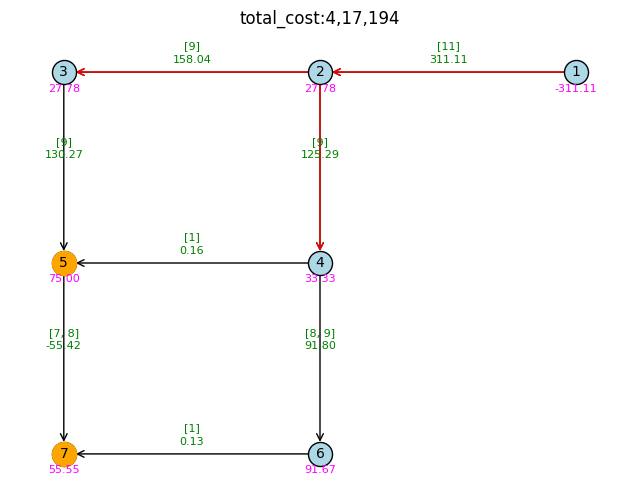

Delta3_5: 74.84293871765354
Delta4_5: -55.26559922773029
Delta5_7: 55.42266051007674
Delta6_7: 0.13233948992326267
{(3, 5): 74.84293871765354, (7, 5): 55.42266051007674, (4, 5): -55.26559922773029, (6, 7): 0.13233948992326267}

******************************************************************************************************************************************
Iteration : 1 

Nodes_indegree_2_or_more: [5, 7]
inarc: [(3, 5), (4, 5), (7, 5), (6, 7)] 

Arc: (3, 5) Acyclic: True Best_optimal: 4,17,194 New_optimal: 5,48,893 Solve_time: 0.06 Solve_result: solved Improved: No  Time_count: 0.3
Arc: (4, 5) Acyclic: True Best_optimal: 4,17,194 New_optimal: 4,57,484 Solve_time: 0.04 Solve_result: solved Improved: No  Time_count: 0.36
 
Arc: (5, 7) Acyclic: True Best_optimal: 4,17,194 New_optimal: 4,03,404 Solve_time: 0.04 Solve_result: solved Improved: Yes Time_count: 0.41
 
Delta3_5: 74.53658765588155
Delta4_5: 0.2710001200996014
Delta7_5: 0.1924122240188555
{(3, 5): 74.53658765588155, (4, 5

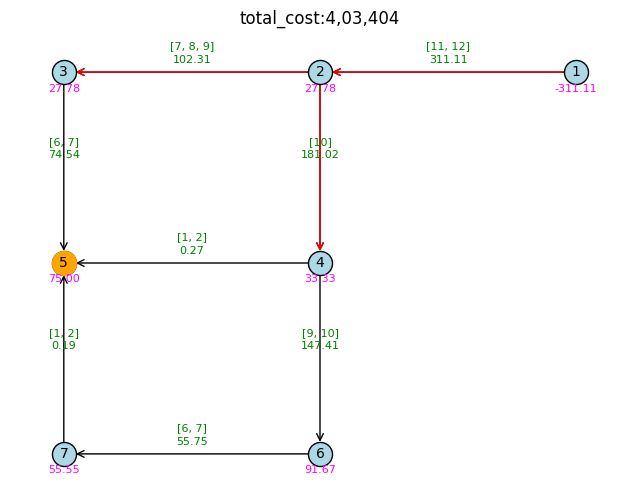

 

******************************************************************************************************************************************
Iteration : 2 

Nodes_indegree_2_or_more: [5]
inarc: [(3, 5), (4, 5), (7, 5)] 

Arc: (3, 5) Acyclic: True Best_optimal: 4,03,404 New_optimal: 5,48,893 Solve_time: 0.04 Solve_result: solved Improved: No  Time_count: 0.57
Arc: (4, 5) Acyclic: False
Arc: (7, 5) Acyclic: True Best_optimal: 4,03,404 New_optimal: 4,22,650 Solve_time: 0.04 Solve_result: solved Improved: No  Time_count: 0.62
 

*********************************************************Final best results***************************************************************
Water Network: 0
Final best objective: 403404.3548991572
Number of nlp problem solved: 6
Total number of iteration to solve the problem: 2
Solver_time: 0.289456 seconds
Heuristic elapsed time:, 0.6224734783172607 seconds = 0.01 minutes.


In [34]:
import networkx as nx
from amplpy import AMPL
import matplotlib.pyplot as plt
import numpy as np
import time
import copy
import sys
import os
import contextlib
from sklearn.decomposition import PCA
import random

import matplotlib.lines as mlines
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

class WaterNetworkOptimizer:
    def __init__(self, model_file, data_file, data_number):
        self.ampl = AMPL()
        self.model_file = model_file
        self.data_file = data_file
        self.data_number = data_number
        self.total_cost = None
        self.network_graph = None
        self.solve_result = None
        self.solver_time = 0
        self.best_acyclic_flow = None
        self.number_of_nlp = 0

    def load_model(self):
        """Load the model and data."""
        self.ampl.reset()
        self.ampl.read(self.model_file)
        self.ampl.read_data(self.data_file)
        
        self.nodes = self.ampl.getSet('nodes')
        self.source = self.ampl.getSet('Source')
        self.arcs = self.ampl.getSet('arcs')
        self.pipes = self.ampl.getSet('pipes')
        
        self.L = self.ampl.getParameter('L').to_dict()
        self.D = self.ampl.getParameter('D').to_dict()
        self.C = self.ampl.getParameter('C').to_dict()
        self.P = self.ampl.getParameter('P').to_dict()
        self.R = self.ampl.getParameter('R').to_dict()
        self.E = self.ampl.getParameter('E').to_dict()
        self.d = self.ampl.getParameter('d').to_dict()

        self.delta = 0.1
        self.p = 1.852
        self.omega = 10.67

    def create_digraph(self):
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list()
        self.network_graph = nx.DiGraph()
        self.network_graph.add_nodes_from(nodes_list)
        self.network_graph.add_edges_from(edges_list)
        print(nodes_list)
        print(edges_list)

    def display_results(self):
        """Display relevant results from the optimization."""
        self.ampl.eval("display {(i,j) in arcs, k in pipes:l[i,j,k]>1} l[i,j,k];")
        self.ampl.eval("display {(i,j) in arcs}: q[i,j];")
        self.ampl.eval("display h;")
        self.ampl.eval("display solve_result;")
        self.total_cost = self.ampl.get_objective("total_cost").value()
        print("Objective:", self.total_cost)
        # self.ampl.eval("display {(i,j) in arcs} h[i] - h[j];")
        # self.ampl.eval("display {i in nodes} h[i] - (E[i] + P[i]);")

    # def plot_graph(self):
    #     print("Edges of the graph:",self.network_graph.edges())
    #     plt.figure(figsize=(10, 8))
    #     nx.draw_spectral(self.network_graph, with_labels=True)
    #     plt.show()


    def plot_graph1(self, super_source_out_arc=None, best_arc=None,current_cost = None, iteration= 1):
        # print("Edges of the graph:", self.network_graph.edges())
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        
        plt.figure(figsize=(10, 8))
        pos = nx.spectral_layout(self.network_graph)
        nx.draw_networkx_nodes(self.network_graph, pos, node_color='lightblue', node_size=200)
        
        if indegree_2_or_more:
            nx.draw_networkx_nodes(self.network_graph, pos, nodelist=indegree_2_or_more, node_color='orange', node_size=200)
            
        nx.draw_networkx_labels(self.network_graph, pos)
        nx.draw_networkx_edges(self.network_graph, pos, edge_color='black')
        
        if super_source_out_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=super_source_out_arc, edge_color='red', width=1)
            
        if best_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=[best_arc], edge_color='magenta', width=1)
            
        plt.title(f"total_cost:{self.total_cost}")
        plt.savefig(f"/home/nitishdumoliya/waterNetwork/model/figure/d{self.data_number}_iteration_{iteration}.png")
        plt.box(False)
        plt.show()

    def plot_graph(self, super_source_out_arc=None, current_cost = None, iteration = 1, edge_weights= None, h = None, D = None, arc=(0,0), l ={}, C = {}):
        # self.network_graph = nx.DiGraph()
        # self.network_graph.add_edges_from(edges)
        # Node positions as per your specifications
        
        new_positions0 = {
             2 : (2000.00, 3000.00),
             3 : (1000.00, 3000.00),        
             4 : (2000.00, 2000.00),        
             5 : (1000.00, 2000.00),       
             6 : (2000.00, 1000.00),       
             7 : (1000.00, 1000.00),      
             1 : (3000.00, 3000.00)     
            }  
        
        new_positions1 = {
            2: (6000.00, 2000.00),
            3: (6000.00, 4000.00),
            4: (7500.00, 4000.00),
            5: (9000.00, 4000.00),
            6: (10000.00, 4000.00),
            7: (10000.00, 6000.00),
            8: (10000.00, 8000.00),
            9: (10000.00, 10000.00),
            10: (9000.00, 10000.00),
            11: (9000.00, 11500.00),
            12: (9000.00, 13000.00),
            13: (7000.00, 13000.00),
            14: (8000.00, 10000.00),
            15: (7000.00, 10000.00),
            16: (6000.00, 10000.00),
            17: (6000.00, 8500.00),
            18: (6000.00, 7000.00),
            19: (6000.00, 5500.00),
            20: (4500.00, 4000.00),
            21: (4500.00, 2000.00),
            22: (4500.00, 0.00),
            23: (3000.00, 4000.00),
            24: (3000.00, 7000.00),
            25: (3000.00, 10000.00),
            26: (4000.00, 10000.00),
            27: (5000.00, 10000.00),
            28: (1500.00, 4000.00),
            29: (0.00, 4000.00),
            30: (0.00, 7000.00),
            31: (0.00, 10000.00),
            32: (1500.00, 10000.00),
            1: (8000.00, 0.00)
        }       
        
        new_positions16 = {
            2: (5679.61, 9538.83),
            3: (4862.46, 9538.83),
            4: (2750.81, 9474.11),
            5: (1852.75, 8357.61),
            6: (1974.11, 6076.05),
            7: (1974.11, 5149.68),
            8: (4235.44, 5076.86),
            9: (6411.81, 5093.04),
            10: (5412.62, 7888.35),
            11: (4510.52, 8264.56),
            12: (3033.98, 9243.53),
            13: (2301.78, 8078.48),
            14: (2944.98, 7669.90),
            15: (3786.41, 7139.97),
            16: (4830.10, 6480.58),
            17: (7099.51, 8438.51),
            18: (5505.66, 8450.65),
            19: (3563.92, 8839.00),
            20: (3167.48, 7532.36),
            21: (2730.58, 7285.60),
            22: (3511.33, 6666.67),
            23: (4097.90, 6286.41),
            24: (3337.38, 5121.36),
            25: (4530.74, 6011.33),
            26: (4215.21, 7783.17),
            27: (5194.17, 7055.02),
            28: (5218.45, 5089.00),
            29: (5622.98, 5999.19),
            30: (5950.65, 5796.93),
            31: (6614.08, 7621.36),
            32: (5380.26, 7544.50),
            33: (6318.77, 7281.55),
            34: (6549.35, 7212.78),
            35: (6585.76, 6092.23),
            36: (7152.10, 6104.37),
            1: (7111.65, 7532.36),
            37: (7669.90, 7783.17)
        }

        # # Update node positions
        pos = new_positions0
        # pos = nx.spectral_layout(self.network_graph)

        cost = {}

        for (i,j) in self.ampl.getSet('arcs'):
            cost[i,j] = sum(l[i,j,k] * C[k] for k in self.ampl.getSet('pipes'))
        
        plt.figure(figsize=(8, 6))
        cmap = plt.cm.plasma
        
        nx.draw_networkx_nodes(self.network_graph, pos, node_color='lightblue',edgecolors="black", node_size=300, label='Regular Nodes')
        
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        if indegree_2_or_more:
            nx.draw_networkx_nodes(self.network_graph, pos, nodelist=indegree_2_or_more, node_color='orange',edgecolors="orange", node_size=300, label='Nodes with In-Degree ≥ 2')
        
        nx.draw_networkx_labels(self.network_graph, pos, font_size=10)
        
        nx.draw_networkx_edges(self.network_graph, pos, arrowstyle="->", arrowsize=12, edge_color='black', label='Regular Arcs')

        if super_source_out_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=super_source_out_arc,arrowstyle="->", arrowsize=12, edge_color='red', width=1, label='Fix arc direction')
        
        # if best_arc:
        #     nx.draw_networkx_edges(self.network_graph, pos, edgelist=[best_arc],arrowstyle="->", arrowsize=12, edge_color='magenta', width=1, label = 'Best arc')
        # Annotate node demands
        if h:
            for node, (x, y) in pos.items():
                demand = h.get(node, 0)  # Get the head for the node, default to 0 if not in dictionary
                # plt.text(x, y + 120, f"{demand:.2f}", fontsize=8, color='blue', ha='center')  # Annotate demand below the node
                # plt.text(x, y + 200, f"{demand:.2f}", fontsize=8, color='blue', ha='center')  # Annotate demand below the node
                # plt.text(x, y -100 , f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
                # plt.text(mid_x, mid_y + 50 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
                # plt.text(mid_x, mid_y + 100, f"{value:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        if D:
            for node, (x, y) in pos.items():
                demand = D.get(node, 0)  # Get the demand for the node, default to 0 if not in dictionary
                # plt.text(x, y - 450, f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
                plt.text(x, y -100 , f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
            

        if edge_weights:
            for (u, v), weight in edge_weights.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                # plt.text(mid_x, mid_y-250 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
                plt.text(mid_x, mid_y + 50 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        if cost:
            for (u, v), value in cost.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                # plt.text(mid_x, mid_y-300 , f"{round(value)}", fontsize=8, color='purple', ha='center')  # Annotate weight on edge
                # plt.text(mid_x, mid_y + 100, f"{value:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        pipe_dia_arc = {}
        for (i,j) in self.arcs:
            list_=[]
            for k in self.pipes:
                if l[i,j,k]>= 1e-5:
                    list_.append(k)
            pipe_dia_arc[i,j] = list_
        
        if pipe_dia_arc:
            for (u, v), weight in pipe_dia_arc.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                # plt.text(mid_x + 200, mid_y + 300 , f"{weight}", fontsize=8, color='purple', ha='center')  # Annotate weight on edge
                plt.text(mid_x, mid_y+120 , f"{weight}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        
        regular_node_patch = mpatches.Patch(color='lightblue', label='Regular Nodes')
        indegree_node_patch = mpatches.Patch(color='orange', label='Nodes with In-Degree ≥ 2')
        regular_edge_line = mlines.Line2D([], [], color='black', label='Regular Arcs')
        super_source_edge_line = mlines.Line2D([], [], color='red', label='Fix arc direction')
        # best_edge_line = mlines.Line2D([], [], color='magenta', label='Best Arc')
        # plt.legend(handles=[regular_node_patch, indegree_node_patch, regular_edge_line, super_source_edge_line], loc='lower right')
        
        cost = round(self.total_cost)
        # res = f"{cost:,}"
        plt.title(f"total_cost:{self.format_indian_number(cost)}")
        # (u,v) = arc
        # plt.savefig(f"/home/nitishdumoliya/waterNetwork/model/figure/d{self.data_number}_iteration_{iteration}.png")
        plt.box(False)
        plt.show()

    
    def cycle_basis(self):
        root = self.ampl.getSet('Source').to_list()[0]
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list() 
        uwg = nx.Graph()
        uwg.add_nodes_from(nodes_list)
        uwg.add_edges_from(edges_list)
        # print("Edges in the undirected graph:", edges_list)
        print("cycle basis for given water network: ",nx.cycle_basis(uwg, root))
        
    def generate_random_acyclic_from_solution(self, q):
        # print("Generate the acyclic network using ipopt solution")
        
        self.network_graph = nx.DiGraph()
        self.network_graph.add_nodes_from(self.nodes)
        
        # q = self.ampl.getVariable('q').getValues().toDict()
        for (i,j) in self.arcs:
            if q[i,j] >= 0:
                self.network_graph.add_edge(i,j)
            else:
                self.network_graph.add_edge(j,i)
        
        return self.network_graph

    
    def generate_random_acyclic_graph(self):
        uwg = nx.Graph()
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list()
        uwg.add_nodes_from(nodes_list)
        uwg.add_edges_from(edges_list)
        print("Edges in the undirected graph:", edges_list)
        
        # Generate a random spanning tree using Wilson's algorithm
        random_tree = nx.random_spanning_tree(uwg)
        
        # Retrieve the root from the AMPL source set
        root_l = self.ampl.getSet('Source').to_list()
        root = root_l[0]
        print("Root node:", root)

        # Ensure the root is present in the random tree
        if root not in random_tree.nodes:
            raise ValueError("The specified root must be a node in the graph.")

        # Create a directed graph from the random tree starting from the specified root
        self.network_graph = nx.DiGraph()
        visited = set()

        def dfs(node):
            visited.add(node)
            for neighbor in random_tree.neighbors(node):
                if neighbor not in visited:
                    self.network_graph.add_edge(node, neighbor) 
                    dfs(neighbor)

        # Start DFS from the specified root
        dfs(root)

        # Draw the initial directed tree
        plt.figure(figsize=(15, 10))
        plt.subplot(121)
        nx.draw_spectral(self.network_graph, with_labels=True, node_color='lightgreen', font_weight='bold', arrows=True)
        plt.title("Directed Spanning Tree")

        # Add remaining edges from the original graph and check for cycles
        for u, v in uwg.edges():
            if not self.network_graph.has_edge(u, v):  
                self.network_graph.add_edge(u, v)  
                if not nx.is_directed_acyclic_graph(self.network_graph):  
                    self.network_graph.remove_edge(u, v)  
                    self.network_graph.add_edge(v, u)  

        # Draw the final directed graph after adding remaining edges
        plt.subplot(122)
        nx.draw_spectral(self.network_graph, with_labels=True, node_color='lightgreen', font_weight='bold', arrows=True)
        plt.title("Acyclic Directed Graph")
        plt.show()

    def update_model(self):
        # print("Fix the arcs direction using the acyclic network\n")
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        for edge in self.network_graph.edges:
            i, j = edge
            if edge in edges_list:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q[{i},{j}] >=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{j}]+P[{j}] <= h[{j}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{j}] + P[{j}] <= h[{i}];")
            else:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q[{j},{i}] <=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{i}]+P[{i}] <= h[{i}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{i}] + P[{i}] <= h[{j}];")  


    def is_valid_edge(self, source, target):
        """Check if adding the directed edge (source -> target) maintains acyclicity."""
        self.network_graph.add_edge(source, target)  # Temporarily add the edge
        is_dag = nx.is_directed_acyclic_graph(self.network_graph)  # Check for acyclicity
        self.network_graph.remove_edge(source, target)  # Remove the edge after checking
        return is_dag  # Return True if it maintains acyclicity     
    
    def check_incoming_arcs(self):
        root = list(self.ampl.getSet('Source'))[0]
        # Iterate over all nodes in the graph
        for node in self.network_graph.nodes():
            # Skip the root node
            if node == root:
                continue
            # Check if the in-degree of the node is at least 1
            if self.network_graph.in_degree(node) < 1:
                # print(f"Node {node} does not have any incoming arcs.")
                return False
        # print("All nodes except the root have at least one incoming arc.")
        return True
            
    def format_indian_number(self,num):
        num_str = str(num)
        if len(num_str) <= 3:
            return num_str
        else:
            # Split the number into the last three digits and the rest
            last_three = num_str[-3:]
            remaining = num_str[:-3]
            # Add commas every two digits in the remaining part
            remaining = ','.join([remaining[max(i - 2, 0):i] for i in range(len(remaining), 0, -2)][::-1])
            return remaining + ',' + last_three

    def fix_leaf_arc_flow(self):
        graph = nx.Graph()
        arc_set = self.ampl.getSet('arcs').to_list()  
        graph.add_edges_from(arc_set)
        D = self.ampl.getParameter('D').getValues().to_dict()  
        source = self.ampl.getSet('Source').to_list()[0]
        fixed_arcs = set()
        # print("\nPresolve the model for fixing the flow value in the leaf arcs")
        # print("Source:",self.ampl.getSet('Source').to_list())

        while True:
            leaf_nodes = [node for node in graph.nodes if graph.degree[node] == 1]
            # print("leaf_nodes:", leaf_nodes)
            if not leaf_nodes:  
                break

            for leaf in leaf_nodes:
                neighbor = next(graph.neighbors(leaf))
                if (neighbor, leaf) in arc_set:
                    edge = (neighbor, leaf)
                    if edge not in fixed_arcs:  
                        if leaf == source:
                            flow_value = D[leaf]
                            D[neighbor] = (D[neighbor]+flow_value)
                            source = neighbor
                        else:
                            flow_value = D[leaf]
                            D[neighbor] = D[neighbor] + flow_value
                        self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        # print(f"Fixing flow for arc {edge}: {flow_value}")
                        fixed_arcs.add(edge)  

                    graph.remove_node(leaf)
                else:
                    edge = (leaf, neighbor)
                    if edge not in fixed_arcs:  
                        if leaf == source:
                            flow_value = -D[leaf]
                            D[neighbor] = D[neighbor]-flow_value
                            source = neighbor
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        elif neighbor == source:
                            flow_value = -D[leaf]
                            D[neighbor] = D[neighbor] - D[leaf] 
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        else:
                            flow_value = -D[leaf]
                            D[neighbor] += -flow_value
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        # print(f"Fixing flow for arc {edge}: {flow_value}")
                        fixed_arcs.add(edge)  
                    graph.remove_node(leaf)
        # print("All leaf arc flows have been fixed.")
        return fixed_arcs

    def is_cycle(self, graph, start_node, end_node, visited_copy, parent):
        visited_copy[start_node] = True
        # print(f"Is node {end_node} in cycle?")
        for neighbor in graph.neighbors(start_node):
            # print("visited",neighbor,visited_copy[neighbor])
            if not visited_copy[neighbor]:
                # print("neighbor of node", start_node, "is", neighbor)
                isCycle = self.is_cycle(graph, neighbor, end_node, visited_copy, start_node)
                if isCycle:
                    return True
            else:
                # print("parent:", parent)
                if parent != neighbor:
                    if end_node == neighbor:
                        # print(f"Node {end_node} is in cycle")
                        return True
        return False

    def presolve(self, graph, node, visited, parent, set_arc):
        visited_copy = visited.copy()
        # print(visited_copy)
        isCycle = self.is_cycle(graph, node, node, visited_copy, parent)
        # print(f"Is node {node} in cycle?",isCycle)
        visited[node] = True
        if isCycle:
            for neighbor in graph.neighbors(node):
                if parent!=neighbor:
                    set_arc.append((node,neighbor))
                    # print("Fix the arc", (node, neighbor))
            return set_arc
        else:
            for neighbor in graph.neighbors(node):
                if parent != neighbor:
                    set_arc.append((node,neighbor))
                    # print(set_arc)
                    # print("Fix the arc", (node, neighbor))
                    # print("neighbor:", neighbor)
                    self.presolve(graph, neighbor, visited, node, set_arc)
        return set_arc

    def fix_arc_set(self):
        graph = nx.Graph()
        arc_set = self.ampl.getSet('arcs').to_list()
        graph.add_edges_from(arc_set)
        visited = {node: False for node in graph.nodes()}
        source = self.ampl.getSet('Source').to_list()[0]
        set_arc = []
        # print("\nPresolve the model for fixing the arc direction")
        set_ = self.presolve(graph, source, visited, -1, set_arc)
        # print("fixed arc direction:",set_, "\n") 
        return set_

    def update_initial_points(self,l_solution, q_solution, h_solution):
        for (i, j, k), val in l_solution.items():
            self.ampl.eval(f'let l[{i},{j},{k}] := {val};')
        for (i, j), val in q_solution.items():
            self.ampl.eval(f'let q[{i},{j}] := {val};')
        for i, val in h_solution.items():
            self.ampl.eval(f'let h[{i}] := {val};')

    def update_initial_points1(self, l_solution, q_solution, h_solution, t_solution,all_duals, inarc):
        for (i, j, k), val in l_solution.items():
            self.ampl.eval(f'let l[{i},{j},{k}] := {val};')
        
        edge_list_network = self.network_graph.edges
        
        for i, val in h_solution.items():
            self.ampl.eval(f'let h[{i}] := {val};')
        
        for (i, j), val in q_solution.items():
            edge = (i, j) 
            if edge in edge_list_network:
                if (i,j) not in inarc:
                    # print(f"self.ampl.eval(let q[{i},{j}] := {val};)")
                    self.ampl.eval(f"let q[{i},{j}] := {val} ;")
                else:
                    # print(f"self.ampl.eval(let q[{i},{j}] := {-val};)")
                    self.ampl.eval(f"let q[{i},{j}] := {val} ;")
            else:
                if (j,i) not in inarc:
                    # print(f"self.ampl.eval(let q[{i},{j}] := {val};)")
                    self.ampl.eval(f"let q[{i},{j}] := {val};")
                else:
                    # print(f"self.ampl.eval(let q[{j},{i}] := {-val};)")
                    self.ampl.eval(f"let q[{j},{i}] := {val} ;")
        for i, val in t_solution.items():
            self.ampl.eval(f'let t[{i}] := {val};')
            
        # current_duals = {}
        # for con_name, val in self.ampl.get_constraints():
        #     dual_values = val.get_values()
        #     current_duals[con_name] = dual_values

        # Initialize dual values for all constraints
        # for con_name, dual_values in all_duals.items():
            # if con_name in current_duals:
                # Initialize dual values for each constraint
                # self.ampl.get_constraint(con_name).set_values(dual_values)
            # else:
            #     print(f"Skipping initialization for constraint: {con_name} (not in current model)")
    
    def update_initial_points_with_perturbation(self, l_solution, q_solution, h_solution,all_duals, inarc, delta=0.1):
        edge_list_network = self.network_graph.edges
        L = self.ampl.getParameter('L').getValues().to_dict()
        # Perturb l values
        for (i, j, k), val in l_solution.items():
            if (i,j) not in inarc:
                if val>= 1e-5:
                    perturbation = random.gauss(0, 1)
                    new_val = val + perturbation
                    # if val >= 1e-5:
                    self.ampl.eval(f'let l[{i},{j},{k}] := {new_val};')
                else:
                    self.ampl.eval(f'let l[{i},{j},{k}] := {0};')
            else:
                if val>= 1e-5:
                    perturbation = random.gauss(0, 1)
                    new_val = val + perturbation
                    self.ampl.eval(f'let l[{i},{j},{k}] := {new_val};')
                else:
                    self.ampl.eval(f'let l[{i},{j},{k}] := {0};')
                    
        # Perturb h values
        for i, val in h_solution.items():
            perturbation = random.gauss(0, 1)
            new_val = val + perturbation
            self.ampl.eval(f'let h[{i}] := {new_val};')

        # Modify q values based on heuristic
        for (i, j), val in q_solution.items():
            edge = (i, j)
            perturbation = random.gauss(0, 1)
            if edge in edge_list_network:
                if (i, j) not in inarc:
                    self.ampl.eval(f"let q[{i},{j}] := {val + perturbation};")
                else:
                    self.ampl.eval(f"let q[{i},{j}] := {(val + perturbation)};")
            else:
                if (j, i) not in inarc:
                    self.ampl.eval(f"let q[{i},{j}] := {val + perturbation};")
                else:
                    self.ampl.eval(f"let q[{j},{i}] := {(val + perturbation)};")
        
        current_duals = {}
        for con_name, val in self.ampl.get_constraints():
            dual_values = val.get_values()
            current_duals[con_name] = dual_values

        # Initialize dual values for all constraints
        for con_name, dual_values in all_duals.items():
            if con_name in current_duals:
                # Initialize dual values for each constraint
                self.ampl.get_constraint(con_name).set_values(dual_values)

    def acyclic_arcs(self):
        network_graph = self.best_acyclic_flow
        indegree_2_or_more = [node for node, indeg in network_graph.in_degree() if indeg >= 2]
        acyclic_arc = set()
        for node in indegree_2_or_more:
            # print("Node:", node,"in_degree:", self.network_graph.in_degree(node))
            for edge in list(network_graph.in_edges(node)):
                (u, v) = edge
                if (u,v) not in self.super_source_out_arc :
                    network_graph.remove_edge(u,v)
                    network_graph.add_edge(v,u)
                    acy_check = nx.is_directed_acyclic_graph(network_graph)
                    in_arc_check = self.check_incoming_arcs()
                    # print("Acyclic", acy_check and in_arc_check)
                    if acy_check and in_arc_check:
                        acyclic_arc.add((u,v))
                        # if (u,v) in self.arcs:
                        #     acyclic_arc.add((u,v))
                        # else:
                        #     acyclic_arc.add((v,u))

                    network_graph.remove_edge(v, u)
                    network_graph.add_edge(u, v) 
        return acyclic_arc

    
    def iterate_arc(self, iteration, improved, current_cost, best_arc):
        improved = False
        self.network_graph = self.best_acyclic_flow.copy()
        
        # print("Acyclic network arcs direction: ",self.network_graph.edges())
        # print("Fixed arc set:",self.super_source_out_arc)
        print("Nodes_indegree_2_or_more:", self.indegree_2_or_more)
        BEST_ARC = []
        # BEST_ARC.append(best_arc)
        
        self.inarc = []
        for node in self.indegree_2_or_more:
            for (u, v) in list(self.network_graph.in_edges(node)):
                if (u, v) in self.arcs:
                    self.inarc.append((u,v))
                else:
                    self.inarc.append((v,u))
        print("inarc:", self.inarc, "\n")
        inarc_ = self.inarc
        
        inarc_set = []
        for (i, j) in self.inarc:
            if (i, j) in self.arcs:
                inarc_set.append(f"({i},{j})")
            else:
                inarc_set.append(f"({j},{i})")
        
        # Convert the list into a string compatible with AMPL
        inarc_set = ", ".join(inarc_set)
        
        for node in self.indegree_2_or_more:
            # print("Node:", node,"in_degree:", self.network_graph.in_degree(node))
            for u,v in list(self.network_graph.in_edges(node)):
                if (u,v) not in self.super_source_out_arc:
                    self.network_graph.remove_edge(u,v)
                    self.network_graph.add_edge(v,u)
                    acy_check = nx.is_directed_acyclic_graph(self.network_graph)
                    in_arc_check = self.check_incoming_arcs()
                    # print("Acyclic", acy_check and in_arc_check)
                    if acy_check and in_arc_check:
                        #l_sol, q_sol, h_sol = self.generate_initial_points()
                        self.load_model()
                        self.ampl.eval(f"set inarc := {{{inarc_set}}};")
                        self.ampl.eval(f"set indegree_node := {{{set(self.indegree_2_or_more)}}};")
                        self.ampl.eval("minimize total_cost : sum{(i,j) in arcs} sum{k in pipes}l[i,j,k]*C[k];")
                        fix_arc_set = self.fix_leaf_arc_flow()
                        self.update_initial_points1(self.l, self.q, self.h, self.t, self.all_duals, self.inarc)
                        # self.update_model()
                        self.ampl.eval(f"param Q_max = sum{{k in nodes diff Source }} D[k];")   
                        # self.ampl.eval("subject to con7{(i,j) in arcs}: -sum{k in nodes diff Source} D[k] <= q[i,j];")
                        # self.ampl.eval("subject to con8{(i,j) in arcs}: q[i,j] <= sum{k in nodes diff Source} D[k];")
                        # self.ampl.eval("subject to con6{i in nodes diff Source}: h[i] = E[i] + P[i] + t[i] ;")
                        if (u,v) in self.arcs:
                            self.ampl.eval(f"s.t. flow_direction{u}_{v}: q[{u}, {v}]<=0;")
                            # self.ampl.eval(f"s.t. flow_bound_left_{u}_{v}: -Q_max <= q[{u}, {v}];")
                        else:
                            self.ampl.eval(f"s.t. flow_direction{u}_{v}: q[{v}, {u}]>=0;")
                            # self.ampl.eval(f"s.t. flow_bound_right_{u}_{v}: q[{v}, {u}] <= Q_max;")
                        
                        # if (u,v) in self.arcs:
                        #     print(f"Delta{u}_{v}:", self.D[v]-self.q[u,v])
                        # else:
                        #     print(f"Delta{u}_{v}:", self.D[v]-abs(self.q[v,u]))
                            
                        self.solve1()
                        
                        l = self.ampl.getVariable('l').getValues().to_dict()
                        q = self.ampl.getVariable('q').getValues().to_dict()
                        h = self.ampl.getVariable('h').getValues().to_dict()
                        t = self.ampl.getVariable('t').getValues().to_dict()
                        
                        
                        if self.solve_result == "solved":
                            
                            if self.total_cost < current_cost:
                                # print("Arc", (u,v),"Acyclic:", acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)), "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result, "Improved: Yes")
                                
                                print(f"Arc: {(u,v)}",
                                      f"Acyclic: {acy_check and in_arc_check}",
                                      f"Best_optimal: {self.format_indian_number(round(current_cost))}", 
                                      f"New_optimal: {self.format_indian_number(round(self.total_cost))}", 
                                      f"Solve_time: {round(self.ampl.get_value('_solve_elapsed_time'), 2)}", 
                                      f"Solve_result: {self.solve_result}", "Improved: Yes", 
                                      f"Time_count: {round(time.time() - self.start_time, 2)}")

                                current_cost = self.total_cost
                                improved = True
                                self.network_graph = self.generate_random_acyclic_from_solution(q)
                                
                                self.best_acyclic_flow = self.network_graph.copy()
                                self.indegree_2_or_more = [node for node, indeg in self.best_acyclic_flow.in_degree() if indeg >= 2]
                                # print("indegree_2_or_more:", self.indegree_2_or_more)
                                
                                best_arc = (v,u)
                                self.l = l 
                                self.q = q
                                self.h = h 
                                self.t = t

                                self.all_duals = {}
                                for con_name, val in self.ampl.get_constraints():
                                    # Get dual values for each constraint
                                    dual_values = val.getValues()
                                    self.all_duals[con_name] = dual_values

                                self.inarc = []
                                for node in self.indegree_2_or_more:
                                    for (u, v) in self.best_acyclic_flow.in_edges(node):
                                        if (u, v) in self.arcs:
                                            if (u,v) not in self.super_source_out_arc:
                                                self.inarc.append((u,v))
                                        else:
                                            self.inarc.append((v,u))
                                print(" ")
                                sum_arc = {}       
                                delta_arc = {}
                                for node in self.indegree_2_or_more:
                                    sum_arc[node]=0
                                    for (u,v) in self.best_acyclic_flow.in_edges(node):
                                        if (u,v) in self.arcs:
                                            sum_arc[node] += abs(self.q[u,v])
                                        else:
                                            sum_arc[node] += abs(self.q[v,u])
                                    
                                    for (u,v) in self.best_acyclic_flow.in_edges(node):
                                        # delta_arc[u,v] = 0
                                        if (u,v) in self.arcs:
                                            print(f"Delta{u}_{v}:", self.D[node] - sum_arc[node] + abs(self.q[u,v]))
                                            delta_arc[u,v] = self.D[node] - sum_arc[node] + abs(self.q[u,v])
                                        else:
                                            print(f"Delta{u}_{v}:", self.D[node] - sum_arc[node] + abs(self.q[v,u]))
                                            delta_arc[v, u] = self.D[node] - sum_arc[node] + abs(self.q[v,u])
                                                  
                                sorted_dict = dict(sorted(delta_arc.items(), key=lambda item: abs(item[1]), reverse=True))
                                print(sorted_dict)       
                                fix_arc_set = list(set(self.super_source_out_arc) | fix_arc_set)
                                self.plot_graph(fix_arc_set, current_cost, iteration, self.q, self.h, self.D,best_arc, self.l, self.C)
                                
                                break
                            else:
                                # print("Arc", (u,v),"Acyclic:", acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)), "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result, "Improved: No")
                                
                                print(f"Arc: {(u,v)}",
                                      f"Acyclic: {acy_check and in_arc_check}",
                                      f"Best_optimal: {self.format_indian_number(round(current_cost))}", 
                                      f"New_optimal: {self.format_indian_number(round(self.total_cost))}", 
                                      f"Solve_time: {round(self.ampl.get_value('_solve_elapsed_time'), 2)}", 
                                      f"Solve_result: {self.solve_result}", "Improved: No ", 
                                      f"Time_count: {round(time.time() - self.start_time, 2)}")
                                
                                self.network_graph.remove_edge(v, u)
                                self.network_graph.add_edge(u, v)  
                        else:
                            # print("Arc", (u,v),"Acyclic:",acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)),  "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result)
                            print(f"Arc: {(u,v)}",
                                  f"Acyclic: {acy_check and in_arc_check}",
                                  f"Best_optimal: {self.format_indian_number(round(current_cost))}", 
                                  f"New_optimal: {self.format_indian_number(round(self.total_cost))}", 
                                  f"Solve_time: {round(self.ampl.get_value('_solve_elapsed_time'), 2)}", 
                                  f"Solve_result: {self.solve_result}", "Improved: No ", 
                                  f"Time_count: {round(time.time() - self.start_time, 2)}")
                            self.network_graph.remove_edge(v, u)
                            self.network_graph.add_edge(u, v)                         
                    else:
                        print(f"Arc: {(u,v)}",
                              f"Acyclic: {acy_check and in_arc_check}")
                        
                        self.network_graph.remove_edge(v, u)
                        self.network_graph.add_edge(u, v)                      
            print(" ")
            if improved:
                break
        return self.best_acyclic_flow, improved, current_cost, self.l, self.q, self.h,self.t, best_arc
    
    def iterate_acyclic_flows(self):
        """Iterate to find improved acyclic flows by attempting arc reversals while maintaining acyclicity."""
        improved = True 
        
        self.best_acyclic_flow = self.network_graph.copy()
        
        # self.indegree_2_or_more = [node for node, indeg in self.best_acyclic_flow.in_degree() if indeg >= 2]
        # print("indegree_2_or_more:", self.indegree_2_or_more)
        
        if self.solve_result == "solved":
            current_cost = self.total_cost
            self.l = self.ampl.getVariable('l').getValues().to_dict()
            self.q = self.ampl.getVariable('q').getValues().to_dict()
            self.h = self.ampl.getVariable('h').getValues().to_dict()
            self.t = self.ampl.getVariable('t').getValues().to_dict()
            
            self.all_duals = {}
            for con_name, val in self.ampl.get_constraints():
                # Get dual values for each constraint
                dual_values = val.getValues()
                self.all_duals[con_name] = dual_values
        
        elif self.solve_result != "solved":
            current_cost = 10e+14
            self.l = None
            self.q = None
            self.h = None
            self.t = None
        
        iteration = 1
        best_arc = None
        
        self.inarc = []
        for node in self.indegree_2_or_more:
            for (u, v) in self.best_acyclic_flow.in_edges(node):
                if (u, v) in self.arcs:
                    if (u,v) not in self.super_source_out_arc:
                        self.inarc.append((u,v))
                else:
                    self.inarc.append((v,u))
                    
        sum_arc = {}       
        delta_arc = {}
        for node in self.indegree_2_or_more:
            sum_arc[node]=0
            for (u,v) in self.best_acyclic_flow.in_edges(node):
                if (u,v) in self.arcs:
                    sum_arc[node] += abs(self.q[u,v])
                else:
                    sum_arc[node] += abs(self.q[v,u])
            
            for (u,v) in self.best_acyclic_flow.in_edges(node):
                # delta_arc[u,v] = 0
                if (u,v) in self.arcs:
                    print(f"Delta{u}_{v}:", self.D[node] - sum_arc[node] + abs(self.q[u,v]))
                    delta_arc[u,v] = self.D[node] - sum_arc[node] + abs(self.q[u,v])
                else:
                    print(f"Delta{u}_{v}:", self.D[node] - sum_arc[node] + abs(self.q[v,u]))
                    delta_arc[v, u] = self.D[node] - sum_arc[node] + abs(self.q[v,u])
                          
        sorted_dict = dict(sorted(delta_arc.items(), key=lambda item: abs(item[1]), reverse=True))

        print(sorted_dict)
        # self.plot_graph(self.super_source_out_arc, current_cost, 0, self.q, self.h, self.D, (0,0), self.l, self.C)
        
        while improved:
            print("\n******************************************************************************************************************************************")
            print("Iteration :",iteration, "\n")
            self.best_acyclic_flow, improved, current_cost, self.l, self.q, self.h,self.t, best_arc = self.iterate_arc(iteration, improved, current_cost, best_arc)
            # print("Current best acyclic network:")
            # plt.figure(figsize=(10, 8))
            # nx.draw_spectral(best_acyclic_flow, with_labels=True)
            # plt.show()
            # super_source_out_arc = self.fix_arc()
            # super_source_out_arc.append(best_arc)
            iteration += 1
            # print(f"Current best solution: {current_cost}")
            # print(" ")
        
        print("\n*********************************************************Final best results***************************************************************")
        print("Water Network:", self.data_number)
        print(f"Final best objective: {current_cost}")

        print("Number of nlp problem solved:", self.number_of_nlp)
        print("Total number of iteration to solve the problem:", iteration-1)
        # print("length of the arcs: ", l, "\n")
        # print("flow in the arcs: ", q, "\n")
        # print("head value at node: ", h, "\n")
        # self.network_graph = best_acyclic_flow
        # self.load_model()
        # self.update_model()
        # self.multi_solve(current_cost)
        # self.ampl.close()
    
    # Function to suppress output
    @contextlib.contextmanager
    def suppress_output(self):
        # Open devnull to suppress the output
        with open(os.devnull, 'w') as devnull:
            # Redirect stdout and stderr
            old_stdout = sys.stdout
            old_stderr = sys.stderr
            sys.stdout = devnull
            sys.stderr = devnull
            try:
                yield
            finally:
                # Restore original stdout and stderr
                sys.stdout = old_stdout
                sys.stderr = old_stderr
    
    def solve(self):
        with self.suppress_output():
            """Solve the optimization problem."""
            self.ampl.option["solver"] = "ipopt"
            # self.ampl.option["solver"] = "/home/nitishdumoliya/Nitish/minotaur/build/bin/mmultistart"
            # self.ampl.set_option("ipopt_options", "outlev = 0 expect_infeasible_problem = yes bound_push = 0.001 bound_frac = 0.001 warm_start_init_point = yes max_iter = 700")   #max_iter = 1000
            self.ampl.set_option("ipopt_options", """outlev = 0 expect_infeasible_problem = yes bound_push = 0.01 bound_frac = 0.01 warm_start_init_point = yes mu_strategy = adaptive mu_oracle = loqo halt_on_ampl_error = yes max_iter = 3000""")   #max_iter = 1000 mu_strategy = adaptive mu_oracle = loqo max_soc = 4
            self.ampl.option["presolve_eps"] = "6.82e-14"
            self.ampl.option['presolve'] = 1
            # self.ampl.option['solver_msg'] = 0
            # self.ampl.option['show_stats'] = 0
            self.ampl.solve()
            self.solve_result = self.ampl.solve_result
            self.total_cost = self.ampl.get_objective("total_cost").value()
        # print("Objective:", self.total_cost)
        # print("solve_result: ",self.solve_result)
        solve_time = self.ampl.get_value('_solve_elapsed_time')
        self.solver_time += solve_time
        self.number_of_nlp += 1
    
    def solve1(self):
        with self.suppress_output():
            """Solve the optimization problem."""
            self.ampl.option["solver"] = "ipopt"
            # self.ampl.option["solver"] = "/home/nitishdumoliya/Nitish/minotaur/build/bin/mmultistart"
            # self.ampl.set_option("ipopt_options", "outlev = 0 expect_infeasible_problem = yes bound_push = 0.001 bound_frac = 0.001 warm_start_init_point = yes max_iter = 3000")   #max_iter = 1000
            self.ampl.set_option("ipopt_options", """outlev = 0 expect_infeasible_problem = yes bound_push = 0.01 bound_frac = 0.01 warm_start_init_point = yes mu_strategy = adaptive mu_oracle = loqo halt_on_ampl_error = yes max_iter = 3000""")   #max_iter = 1000 mu_strategy = adaptive mu_oracle = loqo max_soc = 4
            self.ampl.option["presolve_eps"] = "6.82e-14"
            self.ampl.option['presolve'] = 1
            # self.ampl.option['solver_msg'] = 0
            # self.ampl.option['show_stats'] = 0
            self.ampl.solve()
            self.solve_result = self.ampl.solve_result
            self.total_cost = self.ampl.get_objective("total_cost").value()
        # print("Objective:", self.total_cost)
        # print("solve_result: ",self.solve_result)
        solve_time = self.ampl.get_value('_solve_elapsed_time')
        self.solver_time += solve_time
        self.number_of_nlp += 1
        
    def run(self):
        """Main method to run the optimization process."""
        
        self.start_time = time.time() 
        print("Solve the original nonconvex optimization problem using IPOPT ")
        self.load_model()
        self.ampl.eval("minimize total_cost : sum{(i,j) in arcs} sum{k in pipes}l[i,j,k]*C[k];")
        fix_arc_set = self.fix_leaf_arc_flow()
        print("fix_arc_set:",fix_arc_set)
        self.super_source_out_arc = self.fix_arc_set()
        print("super_source_out_arc:", self.super_source_out_arc, "\n")
        
        # self.ampl.eval("subject to con7{(i,j) in arcs}: -sum{k in nodes diff Source} D[k] <= q[i,j];")
        # self.ampl.eval("subject to con8{(i,j) in arcs}: q[i,j] <= sum{k in nodes diff Source} D[k];")
        # self.ampl.eval("subject to con6{i in nodes diff Source}: h[i] = E[i] + P[i] + t[i];")
        # self.ampl.eval("display option ipopt_options;")     # Display all options in AMPL
        
        self.solve()
        
        print("Objective: ",self.total_cost)
        print("Solve_result: ",self.solve_result)
        print("Solve_time:", self.ampl.get_value('_solve_elapsed_time'),"\n")
        
        self.l = self.ampl.getVariable('l').getValues().to_dict()
        self.q = self.ampl.getVariable('q').getValues().to_dict()
        self.h = self.ampl.getVariable('h').getValues().to_dict()
        
        self.super_source_out_arc = self.fix_arc_set()
        self.network_graph = self.generate_random_acyclic_from_solution(self.q)
        
        # print("Fix the flow direction in optimization model and solve the updated model")
        
        self.inarc = []
        self.indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        
        for node in self.indegree_2_or_more:
            for (u, v) in list(self.network_graph.in_edges(node)):
                if (u, v) in self.arcs:
                    self.inarc.append((u,v))
                else:
                    self.inarc.append((v,u))
        # print("inarc:", self.inarc)
        inarc_ = self.inarc
        
        inarc_set = []
        for (i, j) in self.inarc:
            if (i, j) in self.arcs:
                inarc_set.append(f"({i},{j})")
            else:
                inarc_set.append(f"({j},{i})")
        inarc_set = ", ".join(inarc_set)
        
        fix_arc_set = list(set(self.super_source_out_arc) | fix_arc_set)
        self.plot_graph(fix_arc_set, self.total_cost, 0, self.q, self.h, self.D, (0,0), self.l, self.C)
        # self.display_results()
        self.iterate_acyclic_flows()
        elapsed_time = time.time() - self.start_time
        
        print("Solver_time:",self.solver_time, "seconds")
        print(f"Heuristic elapsed time:, {elapsed_time} seconds = {elapsed_time/60:.2f} minutes.")
        
if __name__ == "__main__":
    data_list = [
        "d1_Sample_input_cycle_twoloop",
        "d2_Sample_input_cycle_hanoi",
        "d3_Sample_input_double_hanoi",
        "d4_Sample_input_triple_hanoi",
        "d5_Taichung_input",
        "d6_HG_SP_1_4",
        "d7_HG_SP_2_3",
        "d8_HG_SP_3_4",
        "d9_HG_SP_4_2",
        "d10_HG_SP_5_5",
        "d11_HG_SP_6_3",
        "d12",
        "d13",
        "d14_NewYork",
        "d15_foss_poly_0",
        "d16_foss_iron",
        "d17_foss_poly_1",
        "d18_pescara",
        "d19_modena"
    ]

    # Select the data number here (0 to 18)
    data_number = 0
    input_data_file = f"/home/nitishdumoliya/waterNetwork/data/{data_list[data_number]}.dat"
    print("Water Network:", data_list[data_number],"\n")
    optimizer = WaterNetworkOptimizer("../m1Basic.mod", input_data_file, data_number)
    # optimizer = WaterNetworkOptimizer(sys.argv[1], sys.argv[3], sys.argv[2])
    optimizer.run()

In [27]:
import networkx as nx
from amplpy import AMPL
import matplotlib.pyplot as plt
import numpy as np
import time
import copy
import sys
import os
import contextlib
from sklearn.decomposition import PCA
import random

import matplotlib.lines as mlines
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

class WaterNetworkOptimizer:
    def __init__(self, model_file, data_file, data_number):
        self.ampl = AMPL()
        self.model_file = model_file
        self.data_file = data_file
        self.data_number = data_number
        self.total_cost = None
        self.network_graph = None
        self.solve_result = None
        self.solver_time = 0
        self.best_acyclic_flow = None
        self.number_of_nlp = 0

    def load_model(self):
        """Load the model and data."""
        self.ampl.reset()
        self.ampl.read(self.model_file)
        self.ampl.read_data(self.data_file)
        
        self.nodes = self.ampl.getSet('nodes')
        self.source = self.ampl.getSet('Source')
        self.arcs = self.ampl.getSet('arcs')
        self.pipes = self.ampl.getSet('pipes')
        
        self.L = self.ampl.getParameter('L').to_dict()
        self.D = self.ampl.getParameter('D').to_dict()
        self.C = self.ampl.getParameter('C').to_dict()
        self.P = self.ampl.getParameter('P').to_dict()
        self.R = self.ampl.getParameter('R').to_dict()
        self.E = self.ampl.getParameter('E').to_dict()
        self.d = self.ampl.getParameter('d').to_dict()

        self.delta = 0.1
        self.p = 1.852
        self.omega = 10.67

    def create_digraph(self):
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list()
        self.network_graph = nx.DiGraph()
        self.network_graph.add_nodes_from(nodes_list)
        self.network_graph.add_edges_from(edges_list)
        print(nodes_list)
        print(edges_list)

    def display_results(self):
        """Display relevant results from the optimization."""
        self.ampl.eval("display {(i,j) in arcs, k in pipes:l[i,j,k]>1} l[i,j,k];")
        self.ampl.eval("display {(i,j) in arcs}: q[i,j];")
        self.ampl.eval("display h;")
        self.ampl.eval("display solve_result;")
        self.total_cost = self.ampl.get_objective("total_cost").value()
        print("Objective:", self.total_cost)
        # self.ampl.eval("display {(i,j) in arcs} h[i] - h[j];")
        # self.ampl.eval("display {i in nodes} h[i] - (E[i] + P[i]);")

    # def plot_graph(self):
    #     print("Edges of the graph:",self.network_graph.edges())
    #     plt.figure(figsize=(10, 8))
    #     nx.draw_spectral(self.network_graph, with_labels=True)
    #     plt.show()


    def plot_graph1(self, super_source_out_arc=None, best_arc=None,current_cost = None, iteration= 1):
        # print("Edges of the graph:", self.network_graph.edges())
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        
        plt.figure(figsize=(10, 8))
        pos = nx.spectral_layout(self.network_graph)
        nx.draw_networkx_nodes(self.network_graph, pos, node_color='lightblue', node_size=200)
        
        if indegree_2_or_more:
            nx.draw_networkx_nodes(self.network_graph, pos, nodelist=indegree_2_or_more, node_color='orange', node_size=200)
            
        nx.draw_networkx_labels(self.network_graph, pos)
        nx.draw_networkx_edges(self.network_graph, pos, edge_color='black')
        
        if super_source_out_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=super_source_out_arc, edge_color='red', width=1)
            
        if best_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=[best_arc], edge_color='magenta', width=1)
            
        plt.title(f"total_cost:{self.total_cost}")
        plt.savefig(f"/home/nitishdumoliya/waterNetwork/model/figure/d{self.data_number}_iteration_{iteration}.png")
        plt.box(False)
        plt.show()

    def plot_graph(self, super_source_out_arc=None, current_cost = None, iteration = 1, edge_weights= None, h = None, D = None, arc=(0,0), l ={}, C = {}):
        # self.network_graph = nx.DiGraph()
        # self.network_graph.add_edges_from(edges)
        # Node positions as per your specifications
        
        new_positions0 = {
             2 : (2000.00, 3000.00),
             3 : (1000.00, 3000.00),        
             4 : (2000.00, 2000.00),        
             5 : (1000.00, 2000.00),       
             6 : (2000.00, 1000.00),       
             7 : (1000.00, 1000.00),      
             1 : (3000.00, 3000.00)     
            }  
        
        new_positions1 = {
            2: (6000.00, 2000.00),
            3: (6000.00, 4000.00),
            4: (7500.00, 4000.00),
            5: (9000.00, 4000.00),
            6: (10000.00, 4000.00),
            7: (10000.00, 6000.00),
            8: (10000.00, 8000.00),
            9: (10000.00, 10000.00),
            10: (9000.00, 10000.00),
            11: (9000.00, 11500.00),
            12: (9000.00, 13000.00),
            13: (7000.00, 13000.00),
            14: (8000.00, 10000.00),
            15: (7000.00, 10000.00),
            16: (6000.00, 10000.00),
            17: (6000.00, 8500.00),
            18: (6000.00, 7000.00),
            19: (6000.00, 5500.00),
            20: (4500.00, 4000.00),
            21: (4500.00, 2000.00),
            22: (4500.00, 0.00),
            23: (3000.00, 4000.00),
            24: (3000.00, 7000.00),
            25: (3000.00, 10000.00),
            26: (4000.00, 10000.00),
            27: (5000.00, 10000.00),
            28: (1500.00, 4000.00),
            29: (0.00, 4000.00),
            30: (0.00, 7000.00),
            31: (0.00, 10000.00),
            32: (1500.00, 10000.00),
            1: (8000.00, 0.00)
        }       
        
        new_positions16 = {
            2: (5679.61, 9538.83),
            3: (4862.46, 9538.83),
            4: (2750.81, 9474.11),
            5: (1852.75, 8357.61),
            6: (1974.11, 6076.05),
            7: (1974.11, 5149.68),
            8: (4235.44, 5076.86),
            9: (6411.81, 5093.04),
            10: (5412.62, 7888.35),
            11: (4510.52, 8264.56),
            12: (3033.98, 9243.53),
            13: (2301.78, 8078.48),
            14: (2944.98, 7669.90),
            15: (3786.41, 7139.97),
            16: (4830.10, 6480.58),
            17: (7099.51, 8438.51),
            18: (5505.66, 8450.65),
            19: (3563.92, 8839.00),
            20: (3167.48, 7532.36),
            21: (2730.58, 7285.60),
            22: (3511.33, 6666.67),
            23: (4097.90, 6286.41),
            24: (3337.38, 5121.36),
            25: (4530.74, 6011.33),
            26: (4215.21, 7783.17),
            27: (5194.17, 7055.02),
            28: (5218.45, 5089.00),
            29: (5622.98, 5999.19),
            30: (5950.65, 5796.93),
            31: (6614.08, 7621.36),
            32: (5380.26, 7544.50),
            33: (6318.77, 7281.55),
            34: (6549.35, 7212.78),
            35: (6585.76, 6092.23),
            36: (7152.10, 6104.37),
            1: (7111.65, 7532.36),
            37: (7669.90, 7783.17)
        }

        # # Update node positions
        pos = new_positions0
        # pos = nx.spectral_layout(self.network_graph)

        cost = {}

        for (i,j) in self.ampl.getSet('arcs'):
            cost[i,j] = sum(l[i,j,k] * C[k] for k in self.ampl.getSet('pipes'))
        
        plt.figure(figsize=(8, 6))
        cmap = plt.cm.plasma
        
        nx.draw_networkx_nodes(self.network_graph, pos, node_color='lightblue',edgecolors="black", node_size=300, label='Regular Nodes')
        
        indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        if indegree_2_or_more:
            nx.draw_networkx_nodes(self.network_graph, pos, nodelist=indegree_2_or_more, node_color='orange',edgecolors="orange", node_size=300, label='Nodes with In-Degree ≥ 2')
        
        nx.draw_networkx_labels(self.network_graph, pos, font_size=10)
        
        nx.draw_networkx_edges(self.network_graph, pos, arrowstyle="->", arrowsize=12, edge_color='black', label='Regular Arcs')

        if super_source_out_arc:
            nx.draw_networkx_edges(self.network_graph, pos, edgelist=super_source_out_arc,arrowstyle="->", arrowsize=12, edge_color='red', width=1, label='Fix arc direction')
        
        # if best_arc:
        #     nx.draw_networkx_edges(self.network_graph, pos, edgelist=[best_arc],arrowstyle="->", arrowsize=12, edge_color='magenta', width=1, label = 'Best arc')
        # Annotate node demands
        if h:
            for node, (x, y) in pos.items():
                demand = h.get(node, 0)  # Get the head for the node, default to 0 if not in dictionary
                # plt.text(x, y + 120, f"{demand:.2f}", fontsize=8, color='blue', ha='center')  # Annotate demand below the node
                # plt.text(x, y + 200, f"{demand:.2f}", fontsize=8, color='blue', ha='center')  # Annotate demand below the node
                # plt.text(x, y -100 , f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
                # plt.text(mid_x, mid_y + 50 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
                # plt.text(mid_x, mid_y + 100, f"{value:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        if D:
            for node, (x, y) in pos.items():
                demand = D.get(node, 0)  # Get the demand for the node, default to 0 if not in dictionary
                # plt.text(x, y - 450, f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
                plt.text(x, y -100 , f"{demand:.2f}", fontsize=8, color='magenta', ha='center')  # Annotate demand below the node
            

        if edge_weights:
            for (u, v), weight in edge_weights.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                # plt.text(mid_x, mid_y-250 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
                plt.text(mid_x, mid_y + 50 , f"{weight:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        if cost:
            for (u, v), value in cost.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                # plt.text(mid_x, mid_y-300 , f"{round(value)}", fontsize=8, color='purple', ha='center')  # Annotate weight on edge
                # plt.text(mid_x, mid_y + 100, f"{value:.2f}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        pipe_dia_arc = {}
        for (i,j) in self.arcs:
            list_=[]
            for k in self.pipes:
                if l[i,j,k]>= 1e-5:
                    list_.append(k)
            pipe_dia_arc[i,j] = list_
        
        if pipe_dia_arc:
            for (u, v), weight in pipe_dia_arc.items():
                # if self.network_graph.has_edge(u, v):
                mid_x = (pos[u][0] + pos[v][0]) / 2  # Midpoint x-coordinate
                mid_y = (pos[u][1] + pos[v][1]) / 2  # Midpoint y-coordinate
                # plt.text(mid_x + 200, mid_y + 300 , f"{weight}", fontsize=8, color='purple', ha='center')  # Annotate weight on edge
                plt.text(mid_x, mid_y+120 , f"{weight}", fontsize=8, color='green', ha='center')  # Annotate weight on edge
        
        regular_node_patch = mpatches.Patch(color='lightblue', label='Regular Nodes')
        indegree_node_patch = mpatches.Patch(color='orange', label='Nodes with In-Degree ≥ 2')
        regular_edge_line = mlines.Line2D([], [], color='black', label='Regular Arcs')
        super_source_edge_line = mlines.Line2D([], [], color='red', label='Fix arc direction')
        # best_edge_line = mlines.Line2D([], [], color='magenta', label='Best Arc')
        # plt.legend(handles=[regular_node_patch, indegree_node_patch, regular_edge_line, super_source_edge_line], loc='lower right')
        
        cost = round(self.total_cost)
        # res = f"{cost:,}"
        plt.title(f"total_cost:{self.format_indian_number(cost)}")
        # (u,v) = arc
        # plt.savefig(f"/home/nitishdumoliya/waterNetwork/model/figure/d{self.data_number}_iteration_{iteration}.png")
        plt.box(False)
        plt.show()

    
    def cycle_basis(self):
        root = self.ampl.getSet('Source').to_list()[0]
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list() 
        uwg = nx.Graph()
        uwg.add_nodes_from(nodes_list)
        uwg.add_edges_from(edges_list)
        # print("Edges in the undirected graph:", edges_list)
        print("cycle basis for given water network: ",nx.cycle_basis(uwg, root))
        
    def generate_random_acyclic_from_solution(self, q):
        # print("Generate the acyclic network using ipopt solution")
        
        self.network_graph = nx.DiGraph()
        self.network_graph.add_nodes_from(self.nodes)
        
        # q = self.ampl.getVariable('q').getValues().toDict()
        for (i,j) in self.arcs:
            if q[i,j] >= 0:
                self.network_graph.add_edge(i,j)
            else:
                self.network_graph.add_edge(j,i)
        
        return self.network_graph

    
    def generate_random_acyclic_graph(self):
        uwg = nx.Graph()
        nodes_list = [i for i in self.ampl.getSet('nodes')]
        edges_list = self.ampl.getSet('arcs').to_list()
        uwg.add_nodes_from(nodes_list)
        uwg.add_edges_from(edges_list)
        print("Edges in the undirected graph:", edges_list)
        
        # Generate a random spanning tree using Wilson's algorithm
        random_tree = nx.random_spanning_tree(uwg)
        
        # Retrieve the root from the AMPL source set
        root_l = self.ampl.getSet('Source').to_list()
        root = root_l[0]
        print("Root node:", root)

        # Ensure the root is present in the random tree
        if root not in random_tree.nodes:
            raise ValueError("The specified root must be a node in the graph.")

        # Create a directed graph from the random tree starting from the specified root
        self.network_graph = nx.DiGraph()
        visited = set()

        def dfs(node):
            visited.add(node)
            for neighbor in random_tree.neighbors(node):
                if neighbor not in visited:
                    self.network_graph.add_edge(node, neighbor) 
                    dfs(neighbor)

        # Start DFS from the specified root
        dfs(root)

        # Draw the initial directed tree
        plt.figure(figsize=(15, 10))
        plt.subplot(121)
        nx.draw_spectral(self.network_graph, with_labels=True, node_color='lightgreen', font_weight='bold', arrows=True)
        plt.title("Directed Spanning Tree")

        # Add remaining edges from the original graph and check for cycles
        for u, v in uwg.edges():
            if not self.network_graph.has_edge(u, v):  
                self.network_graph.add_edge(u, v)  
                if not nx.is_directed_acyclic_graph(self.network_graph):  
                    self.network_graph.remove_edge(u, v)  
                    self.network_graph.add_edge(v, u)  

        # Draw the final directed graph after adding remaining edges
        plt.subplot(122)
        nx.draw_spectral(self.network_graph, with_labels=True, node_color='lightgreen', font_weight='bold', arrows=True)
        plt.title("Acyclic Directed Graph")
        plt.show()

    def update_model(self):
        # print("Fix the arcs direction using the acyclic network\n")
        edges_list = [(arc[0],arc[1]) for arc in self.ampl.getSet('arcs')]
        for edge in self.network_graph.edges:
            i, j = edge
            if edge in edges_list:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q[{i},{j}] >=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{j}]+P[{j}] <= h[{j}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{j}] + P[{j}] <= h[{i}];")
            else:
                self.ampl.eval(f"s.t. flow_direction{i}_{j}: q[{j},{i}] <=0;")
                # self.ampl.eval(f"s.t. head_bound_left{i}_{j}: E[{i}]+P[{i}] <= h[{i}];")
                # self.ampl.eval(f"s.t. head_bound_right{i}_{j}: E[{i}] + P[{i}] <= h[{j}];")  


    def is_valid_edge(self, source, target):
        """Check if adding the directed edge (source -> target) maintains acyclicity."""
        self.network_graph.add_edge(source, target)  # Temporarily add the edge
        is_dag = nx.is_directed_acyclic_graph(self.network_graph)  # Check for acyclicity
        self.network_graph.remove_edge(source, target)  # Remove the edge after checking
        return is_dag  # Return True if it maintains acyclicity     
    
    def check_incoming_arcs(self):
        root = list(self.ampl.getSet('Source'))[0]
        # Iterate over all nodes in the graph
        for node in self.network_graph.nodes():
            # Skip the root node
            if node == root:
                continue
            # Check if the in-degree of the node is at least 1
            if self.network_graph.in_degree(node) < 1:
                # print(f"Node {node} does not have any incoming arcs.")
                return False
        # print("All nodes except the root have at least one incoming arc.")
        return True
            
    def format_indian_number(self,num):
        num_str = str(num)
        if len(num_str) <= 3:
            return num_str
        else:
            # Split the number into the last three digits and the rest
            last_three = num_str[-3:]
            remaining = num_str[:-3]
            # Add commas every two digits in the remaining part
            remaining = ','.join([remaining[max(i - 2, 0):i] for i in range(len(remaining), 0, -2)][::-1])
            return remaining + ',' + last_three

    def fix_leaf_arc_flow(self):
        graph = nx.Graph()
        arc_set = self.ampl.getSet('arcs').to_list()  
        graph.add_edges_from(arc_set)
        D = self.ampl.getParameter('D').getValues().to_dict()  
        source = self.ampl.getSet('Source').to_list()[0]
        fixed_arcs = set()
        # print("\nPresolve the model for fixing the flow value in the leaf arcs")
        # print("Source:",self.ampl.getSet('Source').to_list())

        while True:
            leaf_nodes = [node for node in graph.nodes if graph.degree[node] == 1]
            # print("leaf_nodes:", leaf_nodes)
            if not leaf_nodes:  
                break

            for leaf in leaf_nodes:
                neighbor = next(graph.neighbors(leaf))
                if (neighbor, leaf) in arc_set:
                    edge = (neighbor, leaf)
                    if edge not in fixed_arcs:  
                        if leaf == source:
                            flow_value = D[leaf]
                            D[neighbor] = (D[neighbor]+flow_value)
                            source = neighbor
                        else:
                            flow_value = D[leaf]
                            D[neighbor] = D[neighbor] + flow_value
                        self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        # print(f"Fixing flow for arc {edge}: {flow_value}")
                        fixed_arcs.add(edge)  

                    graph.remove_node(leaf)
                else:
                    edge = (leaf, neighbor)
                    if edge not in fixed_arcs:  
                        if leaf == source:
                            flow_value = -D[leaf]
                            D[neighbor] = D[neighbor]-flow_value
                            source = neighbor
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        elif neighbor == source:
                            flow_value = -D[leaf]
                            D[neighbor] = D[neighbor] - D[leaf] 
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        else:
                            flow_value = -D[leaf]
                            D[neighbor] += -flow_value
                            self.ampl.eval(f"s.t. fix_q_{edge[0]}_{edge[1]}: q[{edge[0]},{edge[1]}] = {flow_value};")
                        # print(f"Fixing flow for arc {edge}: {flow_value}")
                        fixed_arcs.add(edge)  
                    graph.remove_node(leaf)
        # print("All leaf arc flows have been fixed.")
        return fixed_arcs

    def is_cycle(self, graph, start_node, end_node, visited_copy, parent):
        visited_copy[start_node] = True
        # print(f"Is node {end_node} in cycle?")
        for neighbor in graph.neighbors(start_node):
            # print("visited",neighbor,visited_copy[neighbor])
            if not visited_copy[neighbor]:
                # print("neighbor of node", start_node, "is", neighbor)
                isCycle = self.is_cycle(graph, neighbor, end_node, visited_copy, start_node)
                if isCycle:
                    return True
            else:
                # print("parent:", parent)
                if parent != neighbor:
                    if end_node == neighbor:
                        # print(f"Node {end_node} is in cycle")
                        return True
        return False

    def presolve(self, graph, node, visited, parent, set_arc):
        visited_copy = visited.copy()
        # print(visited_copy)
        isCycle = self.is_cycle(graph, node, node, visited_copy, parent)
        # print(f"Is node {node} in cycle?",isCycle)
        visited[node] = True
        if isCycle:
            for neighbor in graph.neighbors(node):
                if parent!=neighbor:
                    set_arc.append((node,neighbor))
                    # print("Fix the arc", (node, neighbor))
            return set_arc
        else:
            for neighbor in graph.neighbors(node):
                if parent != neighbor:
                    set_arc.append((node,neighbor))
                    # print(set_arc)
                    # print("Fix the arc", (node, neighbor))
                    # print("neighbor:", neighbor)
                    self.presolve(graph, neighbor, visited, node, set_arc)
        return set_arc

    def fix_arc_set(self):
        graph = nx.Graph()
        arc_set = self.ampl.getSet('arcs').to_list()
        graph.add_edges_from(arc_set)
        visited = {node: False for node in graph.nodes()}
        source = self.ampl.getSet('Source').to_list()[0]
        set_arc = []
        # print("\nPresolve the model for fixing the arc direction")
        set_ = self.presolve(graph, source, visited, -1, set_arc)
        # print("fixed arc direction:",set_, "\n") 
        return set_

    def update_initial_points(self,l_solution, q_solution, h_solution):
        for (i, j, k), val in l_solution.items():
            self.ampl.eval(f'let l[{i},{j},{k}] := {val};')
        for (i, j), val in q_solution.items():
            self.ampl.eval(f'let q[{i},{j}] := {val};')
        for i, val in h_solution.items():
            self.ampl.eval(f'let h[{i}] := {val};')

    def update_initial_points1(self, l_solution, q_solution, h_solution, t_solution,all_duals, inarc):
        for (i, j, k), val in l_solution.items():
            self.ampl.eval(f'let l[{i},{j},{k}] := {val};')
        
        edge_list_network = self.network_graph.edges
        
        for i, val in h_solution.items():
            self.ampl.eval(f'let h[{i}] := {val};')
        
        for (i, j), val in q_solution.items():
            edge = (i, j) 
            if edge in edge_list_network:
                if (i,j) not in inarc:
                    # print(f"self.ampl.eval(let q[{i},{j}] := {val};)")
                    self.ampl.eval(f"let q[{i},{j}] := {val} ;")
                else:
                    # print(f"self.ampl.eval(let q[{i},{j}] := {-val};)")
                    self.ampl.eval(f"let q[{i},{j}] := {val} ;")
            else:
                if (j,i) not in inarc:
                    # print(f"self.ampl.eval(let q[{i},{j}] := {val};)")
                    self.ampl.eval(f"let q[{i},{j}] := {val};")
                else:
                    # print(f"self.ampl.eval(let q[{j},{i}] := {-val};)")
                    self.ampl.eval(f"let q[{j},{i}] := {val} ;")
        for i, val in t_solution.items():
            self.ampl.eval(f'let t[{i}] := {val};')
            
        # current_duals = {}
        # for con_name, val in self.ampl.get_constraints():
        #     dual_values = val.get_values()
        #     current_duals[con_name] = dual_values

        # Initialize dual values for all constraints
        # for con_name, dual_values in all_duals.items():
            # if con_name in current_duals:
                # Initialize dual values for each constraint
                # self.ampl.get_constraint(con_name).set_values(dual_values)
            # else:
            #     print(f"Skipping initialization for constraint: {con_name} (not in current model)")
    
    def update_initial_points_with_perturbation(self, l_solution, q_solution, h_solution,all_duals, inarc, delta=0.1):
        edge_list_network = self.network_graph.edges
        L = self.ampl.getParameter('L').getValues().to_dict()
        # Perturb l values
        for (i, j, k), val in l_solution.items():
            if (i,j) not in inarc:
                if val>= 1e-5:
                    perturbation = random.gauss(0, 1)
                    new_val = val + perturbation
                    # if val >= 1e-5:
                    self.ampl.eval(f'let l[{i},{j},{k}] := {new_val};')
                else:
                    self.ampl.eval(f'let l[{i},{j},{k}] := {0};')
            else:
                if val>= 1e-5:
                    perturbation = random.gauss(0, 1)
                    new_val = val + perturbation
                    self.ampl.eval(f'let l[{i},{j},{k}] := {new_val};')
                else:
                    self.ampl.eval(f'let l[{i},{j},{k}] := {0};')
                    
        # Perturb h values
        for i, val in h_solution.items():
            perturbation = random.gauss(0, 1)
            new_val = val + perturbation
            self.ampl.eval(f'let h[{i}] := {new_val};')

        # Modify q values based on heuristic
        for (i, j), val in q_solution.items():
            edge = (i, j)
            perturbation = random.gauss(0, 1)
            if edge in edge_list_network:
                if (i, j) not in inarc:
                    self.ampl.eval(f"let q[{i},{j}] := {val + perturbation};")
                else:
                    self.ampl.eval(f"let q[{i},{j}] := {(val + perturbation)};")
            else:
                if (j, i) not in inarc:
                    self.ampl.eval(f"let q[{i},{j}] := {val + perturbation};")
                else:
                    self.ampl.eval(f"let q[{j},{i}] := {(val + perturbation)};")
        
        current_duals = {}
        for con_name, val in self.ampl.get_constraints():
            dual_values = val.get_values()
            current_duals[con_name] = dual_values

        # Initialize dual values for all constraints
        for con_name, dual_values in all_duals.items():
            if con_name in current_duals:
                # Initialize dual values for each constraint
                self.ampl.get_constraint(con_name).set_values(dual_values)

    def acyclic_arcs(self):
        network_graph = self.best_acyclic_flow
        indegree_2_or_more = [node for node, indeg in network_graph.in_degree() if indeg >= 2]
        acyclic_arc = set()
        for node in indegree_2_or_more:
            # print("Node:", node,"in_degree:", self.network_graph.in_degree(node))
            for edge in list(network_graph.in_edges(node)):
                (u, v) = edge
                if (u,v) not in self.super_source_out_arc :
                    network_graph.remove_edge(u,v)
                    network_graph.add_edge(v,u)
                    acy_check = nx.is_directed_acyclic_graph(network_graph)
                    in_arc_check = self.check_incoming_arcs()
                    # print("Acyclic", acy_check and in_arc_check)
                    if acy_check and in_arc_check:
                        acyclic_arc.add((u,v))
                        # if (u,v) in self.arcs:
                        #     acyclic_arc.add((u,v))
                        # else:
                        #     acyclic_arc.add((v,u))

                    network_graph.remove_edge(v, u)
                    network_graph.add_edge(u, v)
        return acyclic_arc

    
    def iterate_arc(self, iteration, improved, current_cost, best_arc):
        improved = False
        self.network_graph = self.best_acyclic_flow.copy()
        
        # print("Acyclic network arcs direction: ",self.network_graph.edges())
        # print("Fixed arc set:",self.super_source_out_arc)
        print("Nodes_indegree_2_or_more:", self.indegree_2_or_more)
        BEST_ARC = []
        # BEST_ARC.append(best_arc)
        
        self.inarc = []
        for node in self.indegree_2_or_more:
            for (u, v) in list(self.network_graph.in_edges(node)):
                if (u, v) in self.arcs:
                    self.inarc.append((u,v))
                else:
                    self.inarc.append((v,u))
        # print("inarc:", self.inarc, "\n")
        inarc_ = self.inarc
        
        inarc_set = []
        for (i, j) in self.inarc:
            if (i, j) in self.arcs:
                inarc_set.append(f"({i},{j})")
            else:
                inarc_set.append(f"({j},{i})")
        
        # Convert the list into a string compatible with AMPL
        inarc_set = ", ".join(inarc_set)
        
        # for node in self.indegree_2_or_more:
            # print("Node:", node,"in_degree:", self.network_graph.in_degree(node))
        # trac_arc = []
        for edge in self.sorted_delta_arc:
            (u,v) = edge
            # if (u,v) not in self.super_source_out_arc:
            # self.network_graph.remove_edge(u,v)
            # self.network_graph.add_edge(v,u)
            acy_check = True
            in_arc_check = True
            # print("Acyclic", acy_check and in_arc_check)
            # if acy_check and in_arc_check:
            #l_sol, q_sol, h_sol = self.generate_initial_points()
            self.load_model()
            self.ampl.eval(f"set inarc := {{{inarc_set}}};")
            self.ampl.eval(f"set indegree_node := {{{set(self.indegree_2_or_more)}}};")
            self.ampl.eval("minimize total_cost : sum{(i,j) in arcs} sum{k in pipes}l[i,j,k]*C[k];")
            fix_arc_set = self.fix_leaf_arc_flow()
            self.update_initial_points1(self.l, self.q, self.h, self.t, self.all_duals, self.inarc)
            # self.update_model()
            self.ampl.eval(f"param Q_max = sum{{k in nodes diff Source }} D[k];")   
            # self.ampl.eval("subject to con7{(i,j) in arcs}: -Q_max <= q[i,j];")
            # self.ampl.eval("subject to con8{(i,j) in arcs}: q[i,j] <= Q_max;")
            # self.ampl.eval("subject to con2{(i,j) in arcs}: h[i] - h[j]  = (q[i,j]+1e-6)*abs(q[i,j]+1e-6)^1.852 * (0.001^1.852) * sum{k in pipes} (omega * l[i,j,k] / ( (R[k]^1.852) * (d[k]/1000)^4.87));")
            if (u,v) in self.arcs:
                self.ampl.eval(f"s.t. flow_direction{u}_{v}: q[{u}, {v}]<=0;")
                # self.ampl.eval(f"s.t. flow_bound_left_{u}_{v}: -Q_max <= q[{u}, {v}];")
            else:
                self.ampl.eval(f"s.t. flow_direction{u}_{v}: q[{v}, {u}]>=0;")
                # self.ampl.eval(f"s.t. flow_bound_right_{u}_{v}: q[{v}, {u}] <= Q_max;")
            
            # if (u,v) in self.arcs:
            #     print(f"Delta{u}_{v}:", self.D[v]-self.q[u,v])
            # else:
            #     print(f"Delta{u}_{v}:", self.D[v]-abs(self.q[v,u]))
                
            self.solve1()
            
            l = self.ampl.getVariable('l').getValues().to_dict()
            q = self.ampl.getVariable('q').getValues().to_dict()
            h = self.ampl.getVariable('h').getValues().to_dict()
            t = self.ampl.getVariable('t').getValues().to_dict()
            
            
            if self.solve_result == "solved" or self.solve_result == "solved?":
                # trac_arc.append(edge)
                
                if self.total_cost < current_cost:
                    self.visited_arc.append((v,u))
                    # print("Arc", (u,v),"Acyclic:", acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)), "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result, "Improved: Yes")
                    
                    print(f"Arc: {(u,v)}",
                          f"Acyclic: {acy_check and in_arc_check}",
                          f"Best_optimal: {self.format_indian_number(round(current_cost))}", 
                          f"New_optimal: {self.format_indian_number(round(self.total_cost))}", 
                          f"Solve_time: {round(self.ampl.get_value('_solve_elapsed_time'), 2)}", 
                          f"Solve_result: {self.solve_result}", "Improved: Yes", 
                          f"Time_count: {round(time.time() - self.start_time, 2)}")

                    current_cost = self.total_cost
                    improved = True
                    self.network_graph = self.generate_random_acyclic_from_solution(q)
                    
                    self.best_acyclic_flow = self.network_graph.copy()
                    self.indegree_2_or_more = [node for node, indeg in self.best_acyclic_flow.in_degree() if indeg >= 2]
                    # print("indegree_2_or_more:", self.indegree_2_or_more)
                    
                    best_arc = (v,u)
                    self.l = l 
                    self.q = q
                    self.h = h 
                    self.t = t

                    self.all_duals = {}
                    for con_name, val in self.ampl.get_constraints():
                        # Get dual values for each constraint
                        dual_values = val.getValues()
                        self.all_duals[con_name] = dual_values

                    self.inarc = []
                    for node in self.indegree_2_or_more:
                        for (u, v) in self.best_acyclic_flow.in_edges(node):
                            if (u, v) in self.arcs:
                                if (u,v) not in self.super_source_out_arc:
                                    self.inarc.append((u,v))
                            else:
                                self.inarc.append((v,u))
                    print(" ")
                    acyclic_arc_set = self.acyclic_arcs()
                    # print("acyclic_arc_set:",acyclic_arc_set)
                    # delta_h = {}
                    sum_arc = {}       
                    delta_arc = {}
                    for node in self.indegree_2_or_more:
                        sum_arc[node]=0
                        for (u,v) in self.best_acyclic_flow.in_edges(node):
                            if (u,v) in self.arcs:
                                sum_arc[node] += abs(self.q[u,v])
                            else:
                                sum_arc[node] += abs(self.q[v,u])
                        
                        for (u,v) in self.best_acyclic_flow.in_edges(node):
                            # delta_arc[u,v] = 0
                            if (u,v) in self.arcs:
                                if (u,v) in acyclic_arc_set:
                                    # print(f"Delta{u}_{v}:", self.D[node] - sum_arc[node] + abs(self.q[u,v]))
                                    delta_arc[u,v] = self.D[node] - sum_arc[node] + abs(self.q[u,v])
                                    # delta_h[u,v] = abs(self.h[u] - self.h[v])
                            else:
                                if (u,v) in acyclic_arc_set:
                                    # print(f"Delta{u}_{v}:", self.D[node] - sum_arc[node] + abs(self.q[v,u]))
                                    delta_arc[u, v] = self.D[node] - sum_arc[node] + abs(self.q[v,u])
                                    # delta_h[u,v] = abs(self.h[u] - self.h[v])
                    sorted_dict = dict(sorted(delta_arc.items(), key=lambda item: abs(item[1]), reverse=True))
                    
                    # print(sorted_dict)
                    self.sorted_delta_arc = list(sorted_dict.keys())
                    # print(self.sorted_delta_arc)
                    # print("delta_h:",delta_h)
                    
                    sorted_nodes = sorted(self.indegree_2_or_more, key=lambda node: self.D[node], reverse=True)

                    # Step 4: Sort arcs for each node in decreasing absolute delta_arc value
                    final_sorted_arcs = []
                    
                    for node in  sorted_nodes:
                        node_arcs = [(u, v) for (u, v) in self.best_acyclic_flow.in_edges(node) if (u, v) in delta_arc]
                        # node_arcs_sorted = sorted(node_arcs, key=lambda arc: abs(delta_arc[arc]), reverse=True)
                        # final_sorted_arcs.extend(node_arcs_sorted)
                        if node_arcs:  # Ensure there are incoming arcs before picking the max
                            max_arc = max(node_arcs, key=lambda arc: abs(delta_arc[arc]))  # Pick the arc with max absolute delta_arc
                            final_sorted_arcs.append(max_arc)
                            # if self.best_acyclic_flow.in_degree(node) >=3:
                            #     min_arc = min(node_arcs, key=lambda arc: abs(delta_arc[arc]))  # Pick the arc with max absolute delta_arc
                            #     final_sorted_arcs.append(min_arc)
                    
                    # Store final sorted arc order
                    # self.sorted_delta_arc = final_sorted_arcs

                    self.sorted_delta_arc = [item for item in final_sorted_arcs if item not in self.visited_arc]
                    # print("delta_h", delta_h)
                    # delta_h_sort = dict(sorted(delta_h.items(), key=lambda item: abs(item[1]), reverse=True))
                    # self.delta_h_sort_arc = list(delta_h_sort.keys())
                    # print("delta_h_sort_arc",self.delta_h_sort_arc)
                    # Debugging output
                    print("Final sorted arcs:", self.sorted_delta_arc)
                           
                    fix_arc_set = list(set(self.super_source_out_arc) | fix_arc_set)
                    # self.plot_graph(fix_arc_set, current_cost, iteration, self.q, self.h, self.D,best_arc, self.l, self.C)
                    
                    break
                else:
                    self.visited_arc.append(edge)
                    # print("Arc", (u,v),"Acyclic:", acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)), "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result, "Improved: No")
                    
                    print(f"Arc: {(u,v)}",
                          f"Acyclic: {acy_check and in_arc_check}",
                          f"Best_optimal: {self.format_indian_number(round(current_cost))}", 
                          f"New_optimal: {self.format_indian_number(round(self.total_cost))}", 
                          f"Solve_time: {round(self.ampl.get_value('_solve_elapsed_time'), 2)}", 
                          f"Solve_result: {self.solve_result}", "Improved: No ", 
                          f"Time_count: {round(time.time() - self.start_time, 2)}")
                    
                    # self.network_graph.remove_edge(v, u)
                    # self.network_graph.add_edge(u, v)  
            else:
                self.visited_arc.append(edge)
                # print("Arc", (u,v),"Acyclic:",acy_check and in_arc_check, "Best optimal: ", '{:,}'.format(round(current_cost)), "New optimal: ", '{:,}'.format(round(self.total_cost)),  "Solve_time:", self.ampl.get_value('_solve_elapsed_time'), "Solve_result: ", self.solve_result)
                print(f"Arc: {(u,v)}",
                      f"Acyclic: {acy_check and in_arc_check}",
                      f"Best_optimal: {self.format_indian_number(round(current_cost))}", 
                      f"New_optimal: {self.format_indian_number(round(self.total_cost))}", 
                      f"Solve_time: {round(self.ampl.get_value('_solve_elapsed_time'), 2)}", 
                      f"Solve_result: {self.solve_result}", "Improved: No ", 
                      f"Time_count: {round(time.time() - self.start_time, 2)}")
                # self.network_graph.remove_edge(v, u)
                # self.network_graph.add_edge(u, v)                         
         
            # self.network_graph.remove_edge(v, u)
            # self.network_graph.add_edge(u, v)                      
            print(" ")
            if improved:
                break
        return self.best_acyclic_flow, improved, current_cost, self.l, self.q, self.h,self.t, best_arc
    
    def iterate_acyclic_flows(self):
        """Iterate to find improved acyclic flows by attempting arc reversals while maintaining acyclicity."""
        improved = True 
        
        self.best_acyclic_flow = self.network_graph.copy()
        
        # self.indegree_2_or_more = [node for node, indeg in self.best_acyclic_flow.in_degree() if indeg >= 2]
        # print("indegree_2_or_more:", self.indegree_2_or_more)
        
        if self.solve_result == "solved":
            current_cost = self.total_cost
            self.l = self.ampl.getVariable('l').getValues().to_dict()
            self.q = self.ampl.getVariable('q').getValues().to_dict()
            self.h = self.ampl.getVariable('h').getValues().to_dict()
            self.t = self.ampl.getVariable('t').getValues().to_dict()
            
            self.all_duals = {}
            for con_name, val in self.ampl.get_constraints():
                # Get dual values for each constraint
                dual_values = val.getValues()
                self.all_duals[con_name] = dual_values
        
        elif self.solve_result != "solved":
            current_cost = 10e+14
            self.l = None
            self.q = None
            self.h = None
            self.t = None
        
        iteration = 1
        best_arc = None
        
        self.inarc = []
        for node in self.indegree_2_or_more:
            for (u, v) in self.best_acyclic_flow.in_edges(node):
                if (u, v) in self.arcs:
                    if (u,v) not in self.super_source_out_arc:
                        self.inarc.append((u,v))
                else:
                    self.inarc.append((v,u))
        
        acyclic_arc_set = self.acyclic_arcs()
        # print("acyclic_arc_set:",acyclic_arc_set)
        # delta_h = {}
        sum_arc = {}       
        delta_arc = {}
        for node in self.indegree_2_or_more:
            sum_arc[node]=0
            for (u,v) in self.best_acyclic_flow.in_edges(node):
                if (u,v) in self.arcs:
                    sum_arc[node] += abs(self.q[u,v])
                else:
                    sum_arc[node] += abs(self.q[v,u])
            
            for (u,v) in self.best_acyclic_flow.in_edges(node):
                # delta_arc[u,v] = 0
                if (u,v) in self.arcs:
                    if (u,v) in acyclic_arc_set:
                        # print(f"Delta{u}_{v}:", self.D[node] - sum_arc[node] + abs(self.q[u,v]))
                        delta_arc[u,v] = self.D[node] - sum_arc[node] + abs(self.q[u,v])
                        # delta_h[u,v] = (self.h[u] - self.h[v])
                else:
                    if (u,v) in acyclic_arc_set:
                        # print(f"Delta{u}_{v}:", self.D[node] - sum_arc[node] + abs(self.q[v,u]))
                        delta_arc[u, v] = self.D[node] - sum_arc[node] + abs(self.q[v,u])
                        # delta_h[u,v] = (self.h[u] - self.h[v])
        
        sorted_dict = dict(sorted(delta_arc.items(), key=lambda item: abs(item[1]), reverse=True))
        
        # print(sorted_dict)
        self.sorted_delta_arc = list(sorted_dict.keys())
        # print(self.sorted_delta_arc)
        
        sorted_nodes = sorted(self.indegree_2_or_more, key=lambda node: self.D[node], reverse=True)
        
        # Step 4: Sort arcs for each node in decreasing absolute delta_arc value
        final_sorted_arcs = []
        
        for node in  sorted_nodes:
            node_arcs = [(u, v) for (u, v) in self.best_acyclic_flow.in_edges(node) if (u, v) in delta_arc]
            # node_arcs_sorted = sorted(node_arcs, key=lambda arc: abs(delta_arc[arc]), reverse=True)
            # final_sorted_arcs.extend(node_arcs_sorted)
            if node_arcs:  # Ensure there are incoming arcs before picking the max
                max_arc = max(node_arcs, key=lambda arc: abs(delta_arc[arc]))  # Pick the arc with max absolute delta_arc
                final_sorted_arcs.append(max_arc)
                # if self.best_acyclic_flow.in_degree(node) >=3:
                #     min_arc = min(node_arcs, key=lambda arc: abs(delta_arc[arc]))  # Pick the arc with max absolute delta_arc
                #     final_sorted_arcs.append(min_arc)
                
                
                
        # Store final sorted arc order
        self.sorted_delta_arc = final_sorted_arcs


        # print("delta_h", delta_h)
        # delta_h_sort = dict(sorted(delta_h.items(), key=lambda item: abs(item[1]), reverse=True))
        # self.delta_h_sort_arc = (delta_h_sort.keys())
        # print("delta_h_sort_arc",self.delta_h_sort_arc)

        # for (i,j) in self.delta_h_sort_arc:
        #     print(f"delta_h[{i},{j}]", delta_h[i,j])
        
        # Debugging output
        print("Final sorted arcs:", self.sorted_delta_arc)
            
        
        # self.plot_graph(self.super_source_out_arc, current_cost, 0, self.q, self.h, self.D, (0,0), self.l, self.C)
        self.visited_arc = []
        while improved:
            print("\n******************************************************************************************************************************************")
            print("Iteration :",iteration, "\n")
            self.best_acyclic_flow, improved, current_cost, self.l, self.q, self.h,self.t, best_arc = self.iterate_arc(iteration, improved, current_cost, best_arc)
            # print("Current best acyclic network:")
            # plt.figure(figsize=(10, 8))
            # nx.draw_spectral(best_acyclic_flow, with_labels=True)
            # plt.show()
            # super_source_out_arc = self.fix_arc()
            # super_source_out_arc.append(best_arc)
            iteration += 1
            # print(f"Current best solution: {current_cost}")
            # print(" ")
        
        print("\n*********************************************************Final best results***************************************************************")
        print("Water Network:", self.data_number)
        print(f"Final best objective: {current_cost}")

        print("Number of nlp problem solved:", self.number_of_nlp)
        print("Total number of iteration to solve the problem:", iteration-1)
        # print("length of the arcs: ", l, "\n")
        # print("flow in the arcs: ", q, "\n")
        # print("head value at node: ", h, "\n")
        # self.network_graph = best_acyclic_flow
        # self.load_model()
        # self.update_model()
        # self.multi_solve(current_cost)
        # self.ampl.close()
    
    # Function to suppress output
    @contextlib.contextmanager
    def suppress_output(self):
        # Open devnull to suppress the output
        with open(os.devnull, 'w') as devnull:
            # Redirect stdout and stderr
            old_stdout = sys.stdout
            old_stderr = sys.stderr
            sys.stdout = devnull
            sys.stderr = devnull
            try:
                yield
            finally:
                # Restore original stdout and stderr
                sys.stdout = old_stdout
                sys.stderr = old_stderr
    
    def solve(self):
        with self.suppress_output():
            """Solve the optimization problem."""
            self.ampl.option["solver"] = "ipopt"
            self.ampl.option["loqo_options"]="maxit 100000"
            # self.ampl.option["octeract_options"] = "outlev 1"
            self.ampl.option["gurobi_options"] = "outlev 1 presolve 0"
            self.ampl.option["scip_options"] = "outlev  1 timelimit 20 pre:maxrounds 1 pre:settings 3 cvt:pre:all 0" #cvt/pre/all = 0
            # self.ampl.option["solver"] = "/home/nitishdumoliya/Nitish/minotaur/build/bin/mmultistart"
            self.ampl.set_option("ipopt_options", "outlev = 0 expect_infeasible_problem = yes bound_push = 0.001 bound_frac = 0.001 warm_start_init_point = yes")   #max_iter = 1000
            # self.ampl.set_option("ipopt_options", "outlev = 0 expect_infeasible_problem = yes bound_push = 0.001 bound_frac = 0.001 warm_start_init_point = yes mu_strategy = adaptive  max_iter = 600")   #max_iter = 1000
            # self.ampl.set_option("ipopt_options", """outlev = 0 expect_infeasible_problem = yes bound_push = 0.01 bound_frac = 0.01 warm_start_init_point = yes mu_strategy = adaptive mu_oracle = loqo halt_on_ampl_error = yes max_iter = 700""")   #max_iter = 1000 mu_strategy = adaptive mu_oracle = loqo max_soc = 4
            self.ampl.option["presolve_eps"] = "6.82e-14"
            self.ampl.option['presolve'] = 1
            # self.ampl.option['solver_msg'] = 0
            # self.ampl.option['show_stats'] = 0
            self.ampl.solve()
            self.solve_result = self.ampl.solve_result
            self.total_cost = self.ampl.get_objective("total_cost").value()
        # print("Objective:", self.total_cost)
        # print("solve_result: ",self.solve_result)
        solve_time = self.ampl.get_value('_solve_elapsed_time')
        self.solver_time += solve_time
        self.number_of_nlp += 1
    
    def solve1(self):
        with self.suppress_output():
            """Solve the optimization problem."""
            self.ampl.option["solver"] = "ipopt"
            self.ampl.option["loqo_options"]="maxit 10000"
            # self.ampl.option["solver"] = "/home/nitishdumoliya/Nitish/minotaur/build/bin/mmultistart"
            self.ampl.set_option("snopt_options", "meminc = 1 major_iterations_limit = 200")
            # self.ampl.set_option("ipopt_options", "outlev = 0 expect_infeasible_problem = yes bound_push = 0.001 bound_frac = 0.001 warm_start_init_point = yes max_iter = 400")   #max_iter = 1000
            self.ampl.set_option("ipopt_options", """outlev = 0 expect_infeasible_problem = yes bound_push = 0.01 bound_frac = 0.01 warm_start_init_point = yes 
                                                     mu_strategy = adaptive mu_oracle = loqo  halt_on_ampl_error = yes max_iter = 3000 """)   #mu_init 1e-2 max_iter = 1000 mu_strategy = adaptive mu_oracle = loqo max_soc = 4
            self.ampl.option["presolve_eps"] = "6.82e-14"
            self.ampl.option['presolve'] = 1
            # self.ampl.option['solver_msg'] = 0
            # self.ampl.option['show_stats'] = 0
            self.ampl.solve()
            self.solve_result = self.ampl.solve_result
        self.total_cost = self.ampl.get_objective("total_cost").value()
        # print("Objective:", self.total_cost)
        # print("solve_result: ",self.solve_result)
        solve_time = self.ampl.get_value('_solve_elapsed_time')
        self.solver_time += solve_time
        self.number_of_nlp += 1
        
    def run(self):
        """Main method to run the optimization process."""
        
        self.start_time = time.time() 
        print("Solve the original nonconvex optimization problem using IPOPT ")
        self.load_model()
        self.ampl.eval("minimize total_cost : sum{(i,j) in arcs} sum{k in pipes}l[i,j,k]*C[k];")
        fix_arc_set = self.fix_leaf_arc_flow()
        print("fix_arc_set:",fix_arc_set)
        self.super_source_out_arc = self.fix_arc_set()
        print("super_source_out_arc:", self.super_source_out_arc, "\n")
        
        self.ampl.eval(f"param Q_max = sum{{k in nodes diff Source }} D[k];")   
        # self.ampl.eval("subject to con7{(i,j) in arcs}: -Q_max <= q[i,j];")
        # self.ampl.eval("subject to con8{(i,j) in arcs}: q[i,j] <= Q_max;")
        # self.ampl.eval("subject to con2{(i,j) in arcs }: (if -delta<=q[i,j]<=delta  then (0.001^1.852)*(c*(q[i,j]^5) + b*(q[i,j]^3) + a*q[i,j])*(sum{k in pipes} omega * l[i,j,k] / ( (R[k]^1.852) * (d[k]/1000)^4.87)) else (q[i,j] * abs(q[i,j])^0.852) * (0.001^1.852) * sum{k in pipes} omega * l[i,j,k] / ( (R[k]^1.852) * (d[k]/1000)^4.87)) = h[i] - h[j]  ;")
        # self.ampl.eval("display option ipopt_options;")     # Display all options in AMPL
        
        self.solve()
        
        print("Objective: ",self.total_cost)
        print("Solve_result: ",self.solve_result)
        print("Solve_time:", self.ampl.get_value('_solve_elapsed_time'),"\n")
        
        self.l = self.ampl.getVariable('l').getValues().to_dict()
        self.q = self.ampl.getVariable('q').getValues().to_dict()
        self.h = self.ampl.getVariable('h').getValues().to_dict()
        
        self.super_source_out_arc = self.fix_arc_set()
        self.network_graph = self.generate_random_acyclic_from_solution(self.q)
        
        # print("Fix the flow direction in optimization model and solve the updated model")
        
        self.inarc = []
        self.indegree_2_or_more = [node for node, indeg in self.network_graph.in_degree() if indeg >= 2]
        
        for node in self.indegree_2_or_more:
            for (u, v) in list(self.network_graph.in_edges(node)):
                if (u, v) in self.arcs:
                    self.inarc.append((u,v))
                else:
                    self.inarc.append((v,u))
        # print("inarc:", self.inarc)
        inarc_ = self.inarc
        
        inarc_set = []
        for (i, j) in self.inarc:
            if (i, j) in self.arcs:
                inarc_set.append(f"({i},{j})")
            else:
                inarc_set.append(f"({j},{i})")
        inarc_set = ", ".join(inarc_set)
        
        fix_arc_set = list(set(self.super_source_out_arc) | fix_arc_set)
        # self.plot_graph(fix_arc_set, self.total_cost, 0, self.q, self.h, self.D, (0,0), self.l, self.C)
        # self.display_results()
        self.iterate_acyclic_flows()
        elapsed_time = time.time() - self.start_time
        
        print("Solver_time:",self.solver_time, "seconds")
        print(f"Heuristic elapsed time:, {elapsed_time} seconds = {elapsed_time/60:.2f} minutes.")
        
if __name__ == "__main__":
    data_list = [
        "d1_Sample_input_cycle_twoloop",
        "d2_Sample_input_cycle_hanoi",
        "d3_Sample_input_double_hanoi",
        "d4_Sample_input_triple_hanoi",
        "d5_Taichung_input",
        "d6_HG_SP_1_4",
        "d7_HG_SP_2_3",
        "d8_HG_SP_3_4",
        "d9_HG_SP_4_2",
        "d10_HG_SP_5_5",
        "d11_HG_SP_6_3",
        "d12",
        "d13",
        "d14_NewYork",
        "d15_foss_poly_0",
        "d16_foss_iron",
        "d17_foss_poly_1",
        "d18_pescara",
        "d19_modena"
    ]

    # Select the data number here (0 to 18)
    data_number = 5
    input_data_file = f"/home/nitishdumoliya/waterNetwork/data/{data_list[data_number]}.dat"
    print("Water Network:", data_list[data_number],"\n")
    optimizer = WaterNetworkOptimizer("../m1Basic.mod", input_data_file, data_number)
    # optimizer = WaterNetworkOptimizer(sys.argv[1], sys.argv[3], sys.argv[2])
    optimizer.run()

Water Network: d6_HG_SP_1_4 

Solve the original nonconvex optimization problem using IPOPT 
fix_arc_set: {(48, 66), (21, 26), (72, 34), (71, 75), (66, 77), (65, 75), (6, 1), (25, 52), (67, 71), (27, 69), (69, 61), (46, 28), (75, 27), (9, 46), (13, 5)}
super_source_out_arc: [(1, 6), (1, 22), (1, 30)] 

Objective:  3826814.7042735736
Solve_result:  solved
Solve_time: 2.0938619999999997 

Final sorted arcs: [(34, 76), (38, 78), (58, 70), (44, 73), (14, 54), (62, 34), (40, 7), (7, 43), (3, 14), (53, 3), (37, 59), (60, 16), (70, 61), (28, 49), (15, 37), (42, 5), (8, 17), (39, 24), (47, 32), (74, 26), (56, 30)]

******************************************************************************************************************************************
Iteration : 1 

Nodes_indegree_2_or_more: [3, 5, 7, 14, 16, 17, 24, 26, 30, 32, 34, 37, 43, 49, 54, 59, 61, 70, 73, 76, 78]
Arc: (34, 76) Acyclic: True Best_optimal: 38,26,815 New_optimal: 36,32,895 Solve_time: 3.8 Solve_result: solved Improved: 